# Fit a simple kinematic model for the Milky Way disk to the OBA star proper motion data

The model fit in this notebook is the rotation curve presented in equation (7) of [Brunetti & Pfenniger (2010)](https://ui.adsabs.harvard.edu/abs/2010A%26A...510A..34B/abstract).

The Milky Way disk circular velocity curve is fit to the proper motion data, with the following parameters:
* $V_\mathrm{circ,\odot}$ the circular velocity at the location of sun (positive by convention, in km/s)
* $h$ Scale length parameter of the Brunetti & Pfenniger model (pc)
* $p$ Shape parameter of the Brunetti & Pfenniger model (dimensionless, in $[-1,2]$)
* $\mathbf{v}_{\odot,\mathrm{pec}}$ the peculiar motion vector of the sun (km/s)
* $\sigma_{R}$ the velocity dispersion around pure circular motion of the stars in the Galactocentric cylindrical coordinate directions $R$
* $\sigma_{\phi}$ the velocity dispersion around pure circular motion of the stars in the Galactocentric cylindrical coordinate directions $\phi$
* $\sigma_z$ the velocity dispersion around pure circular motion of the stars in the Galactic cylindrical coordinate direction $z$

Fixed parameters:
* $R_\odot$ distance from the sun to the galactic centre, assumed known from GRAVITY measurements. The value used is 8277 pc from [GRAVITY Collaboration et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022A%26A...657L..12G).
* $Y_\odot$ The Galactic Cartesian Y-coordinate of the Sun, by definition 0.
* $Z_\odot$ the height of the sun above (or below) the galactic plane (pc). The value $20.8$ pc from [Bennett & Bovy (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.482.1417B/abstract) is used. NOTE that one can introduce $Z_\odot$ as a parameter in the model below, but experiments show that the data has no constraining power on $Z_\odot$ (even if mathematically the proper motions also depend on $Z_\odot$), as the posterior distribution on the sun's height is the same as the prior.
* $\varpi_i$ parallaxes of the stars are assumed known for now (high precision subsample is used). The parallax uncertainties are thus ignored.
* Coordinates $(\ell,b)_i$, assumed error free

Observations:
* Proper motions in $\ell$ and $b$ (mas/yr)
* Proper motion covariance matrices

## Model details

The stars are assumed to follow strictly circular orbits where the orbital velocity is independent of the galactocentric $z$ coordinate. The velocity $\mathbf{v}$ of a star with parallax $\varpi$ is calculated according to the following steps:

For a star at coordinates $(\ell, b)$ calculate the normal triad $[\mathbf{p}, \mathbf{q}, \mathbf{r}]$:

\begin{equation}
    \mathbf{p} = \begin{pmatrix} -\sin\ell \\ \cos\ell \\ 0 \end{pmatrix}\,,\quad
    \mathbf{q} = \begin{pmatrix} -\sin b\cos\ell \\ -\sin b\sin\ell \\ \cos b \end{pmatrix}\,,\quad
    \mathbf{r} = \begin{pmatrix} \cos b\cos\ell \\ \cos b\sin\ell \\ \sin b \end{pmatrix}\,.
\end{equation}

The calculate the Galactocentric Cartesian star position as:

\begin{equation}
    \mathbf{x} = (1000/\varpi)\mathbf{r} + \mathbf{x}_\odot\,,
\end{equation}

with $\mathbf{x}$ the $(x,y,z)$ position of the star. The coordinate system is right-handed with the Sun located at $(-R_\odot, 0, z_\odot)$ and the sense of the Milky Way rotation such that the azimuthal velocity of the stars $V_\phi$ is negative. The velocity of the star is calculated from the azimuthal velocity $V_\phi(R)$ as:

\begin{equation}
    \mathbf{v} = \begin{pmatrix} -V_\phi(R)\sin\phi \\ V_\phi(R)\cos\phi \\ 0 \end{pmatrix} \quad\text{with}\quad \phi=\text{atan2}(y, x) \quad\text{and}\quad
    R=\sqrt{x^2+y^2}\,.
\end{equation}

The azimuthal velocity $V_\phi(R)$ at the position of the star is calculated as:

\begin{equation}
    V_\phi(R) = -\left(v_0\frac{R}{h}\left[1+\left(\frac{R}{h}\right)^2\right]^{\frac{p-2}{4}}\right) \quad\text{with}\quad
    v_0 = V_{\mathrm{circ},\odot}\left(\frac{R_\odot}{h}\left[1+\left(\frac{R_\odot}{h}\right)^2\right]^{\frac{p-2}{4}}\right)^{-1}\,.
\end{equation}

Finally the proper motions are calculated as:

\begin{equation}
    \mu_{\ell*} = \frac{\varpi}{A_\mathrm{v}}\mathbf{p}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,\quad
    \mu_b = \frac{\varpi}{A_\mathrm{v}}\mathbf{q}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,
\end{equation}

The modelling is done in a Bayesian manner with likelihood:

\begin{equation}
    \mathbf{\mu}_\mathrm{obs} \sim {\cal N}\left(\mathbf{\mu}_\mathrm{model} \mid \mathsf{D}_\mathrm{\mu} \right)\,,
\end{equation}

where the covariance matrix in the likelihood is given as:

\begin{equation}
    \mathsf{D}_\mu = \mathsf{C}_\mu + \begin{pmatrix} \mathbf{p}'\mathsf{S}\mathbf{p} & \mathbf{p}'\mathsf{S}\mathbf{q} \\
    \mathbf{q}'\mathsf{S}\mathbf{p} & \mathbf{q}'\mathsf{S}\mathbf{q}
    \end{pmatrix} (\varpi/A_\mathrm{v})^2\,,
\end{equation}

with the matrix $\mathsf{S}$ representing the velocity dispersion:

\begin{equation}
    \mathsf{S} = \mathsf{J}\mathsf{S}_\mathrm{cyl}\mathsf{J}^\mathrm{T} \quad\text{with}\quad
    \mathsf{J} = \begin{pmatrix}
        \cos\phi & -sin\phi & 0 \\
        \sin\phi & \cos\phi & 0 \\
        0 & 0 & 1
    \end{pmatrix}\,,
    \mathsf{S}_\mathrm{cyl} =
    \begin{pmatrix}
        \sigma^2_{R} & 0 & 0 \\
        0 & \sigma_{\phi}^2 & 0 \\
        0 & 0 & \sigma_z^2
    \end{pmatrix}\,,
\end{equation}

where $\mathsf{S}_\mathrm{cyl}$ is the velocity covariance matrix in cylindrical coordinates and $\mathsf{J}$ represents the rotation to the Cartesian coordinate system (dependent on $\phi$).

The priors on the circular velocity at the sun, $h$, and the sun's peculiar motion components are all normal distributions. The priors on $p$ and the components of $\mathsf{S}_\mathrm{cyl}$ are uniform distributions.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import ujson, os

from scipy.stats import scoreatpercentile as scap

from cmdstanpy import set_cmdstan_path, CmdStanModel, from_csv
import arviz as az
import corner

from astropy.table import Table
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import Galactocentric, ICRS, CartesianDifferential
au_km_year_per_sec = (c.au / (1*u.yr).to(u.s)).to(u.km/u.s).value

from plotstyles import useagab, apply_tufte
from robuststats import rse

from diskkinematicmodel import *
from icrstogal import *
from loadmwsamples import *

useagab()

## Read in the data

First query the Gaia DR3 archive for the data necessary to reproduce the analysis and store in the `../data` folder.

```sql
select gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error, gaia.pmra, gaia.pmra_error,
gaia.pmdec, gaia.pmdec_error, gaia.parallax_pmra_corr, gaia.parallax_pmdec_corr, gaia.pmra_pmdec_corr, 
gaia.radial_velocity, gaia.radial_velocity_error, gaia.rv_template_teff, gaia.grvs_mag, 
gaia.phot_g_mean_mag, gaia.bp_rp, gaia.g_rp, gaia.bp_g, 
gaia.ag_gspphot, gaia.ebpminrp_gspphot, gaia.teff_gspphot, gaia.logg_gspphot,
aps.teff_esphs, aps.logg_esphs, aps.ag_esphs, aps.ebpminrp_esphs, aps.spectraltype_esphs, oba.vtan_flag
from gaiadr3.gold_sample_oba_stars as oba
join gaiadr3.astrophysical_parameters as aps
using (source_id)
join gaiadr3.gaia_source as gaia
using (source_id)
```

The Cartesian and cylindrical galactocentric coordinates are calculate for the stars for use further down.

In [10]:
Rsun = 8.277*u.kpc

obatable = load_mwtable('./data/OBA_sample_1.fits', Rsun=Rsun)

#obatable.write("./data/OBAGoldenSample_xyz.fits", format="fits", overwrite=True)

## Select a sub-sample to work with

Use a high precision parallax sample of O stars. Futher selections are done on the tangential velocity $v_\mathrm{tan}<v_\mathrm{tan,max}$, distance from the plane $|\sin(b)\times1000/\varpi|<z_\mathrm{max}$, and distance from Galactic centre $R_\mathrm{min}<R<R_\mathrm{max}$. The resulting selection is then subsampled randomly to create a manageable sample for the model fitting process.

Number of stars in selected sample: 6952


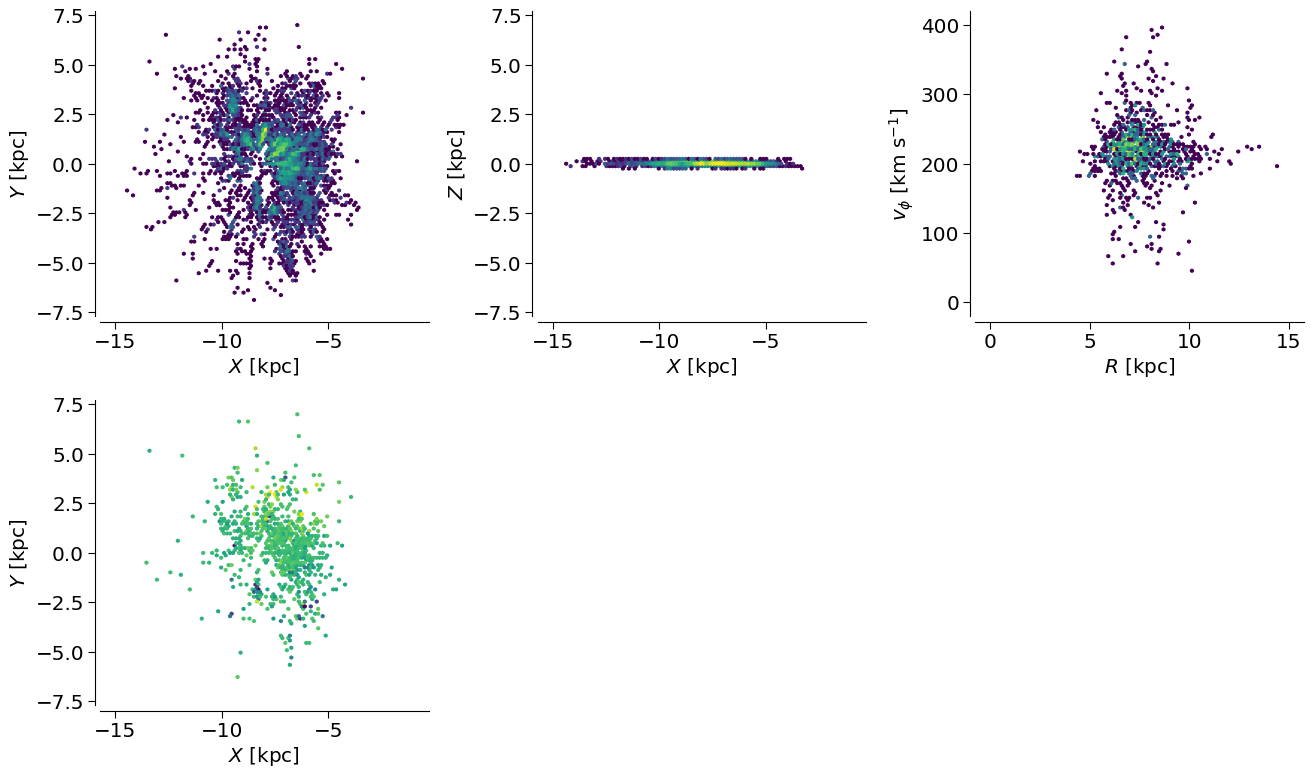

In [11]:
plx_snrlim = 10
vtanhalo = 180.0

startype = (obatable['spectraltype_esphs'] == 'O')
plxfilter = obatable['parallax_over_error']>plx_snrlim
nonhalo = obatable['vtan'] < vtanhalo
zmax = 250

sample_filter_init = startype & plxfilter & nonhalo & (np.abs(np.sin(np.deg2rad(obatable['b']))*1000/obatable['parallax']) < zmax)

R_filter = (obatable['R_gc']>6500.0) & (obatable['R_gc']<15000.0)

sample_filter = sample_filter_init # & R_filter

# Not yet how I first implemented it:
filter_of_choice = "O"

# spt_lum_filter = filter_dictionary[filter_of_choice]
fit_save_location = os.path.join(os.getcwd(), 'fitfiles', filter_of_choice)
#

print(f"Number of stars in selected sample: {obatable['ra'][sample_filter].size}")

subsample_size = 3000
if (obatable['ra'][sample_filter].size <=subsample_size):
    oba_subsample = obatable[sample_filter]
else:
    random_subsample = np.random.choice(np.arange(obatable['ra'][sample_filter].size), size=subsample_size, replace=False)
    oba_subsample = obatable[sample_filter][random_subsample]
    
plotgrid = [-15, -1, -7, 7]
fig=plt.figure(figsize=(16.5,10), tight_layout=True)

gs = fig.add_gridspec(2, 3, figure=fig)

ax_xy = fig.add_subplot(gs[0,0])
apply_tufte(ax_xy)
ax_xz = fig.add_subplot(gs[0,1])
apply_tufte(ax_xz)
ax_rvphi = fig.add_subplot(gs[0,2])
apply_tufte(ax_rvphi)
ax_xy_vphi = fig.add_subplot(gs[1,0])
apply_tufte(ax_xy_vphi)

ax_xy.hexbin(obatable['x_gc'][sample_filter]/1000, obatable['y_gc'][sample_filter]/1000, mincnt=1, bins='log', extent=plotgrid)
ax_xy.set_xlabel(r'$X$ [kpc]') 
ax_xy.set_ylabel(r'$Y$ [kpc]') 

ax_xz.hexbin(obatable['x_gc'][sample_filter]/1000, obatable['z_gc'][sample_filter]/1000, mincnt=1, bins='log', extent=plotgrid)
ax_xz.set_xlabel(r'$X$ [kpc]') 
ax_xz.set_ylabel(r'$Z$ [kpc]')

hasrvs = sample_filter & obatable['rvvalid']
ax_rvphi.hexbin(obatable['R_gc'][hasrvs]/1000, obatable['v_phi_gc'][hasrvs], mincnt=1, bins='log', extent=[0,15,0,400])
ax_rvphi.set_xlabel(r'$R$ [kpc]') 
ax_rvphi.set_ylabel(r'$v_\phi$ [km s$^{-1}$]')

ax_xy_vphi.hexbin(obatable['x_gc'][hasrvs]/1000, obatable['y_gc'][hasrvs]/1000, mincnt=0, C=obatable['v_phi_gc'][hasrvs],
                  reduce_C_function=np.median, bins='log', extent=plotgrid)
ax_xy_vphi.set_xlabel(r'$X$ [kpc]') 
ax_xy_vphi.set_ylabel(r'$Y$ [kpc]') 

plt.show()

## Plot histogram of $\sin(b)\times 1000/\varpi$

Use this to estimate $z_\odot$ for this sample. Note that the precise value of $z_\odot$ has very little effect on the results.

Median d*sin(b): -1.4
RSE d*sin(b): 71.3
Mean d*sin(b): 0.7


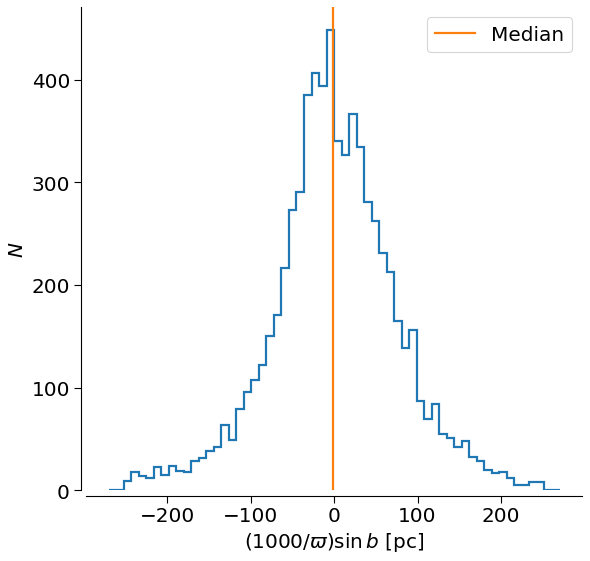

In [12]:
fig, axdsinb = plt.subplots(1, 1, figsize=(8,8))
apply_tufte(axdsinb)

dsinb = (np.sin(np.deg2rad(obatable['b']))*1000.0/obatable['parallax'])[sample_filter]
print(f"Median d*sin(b): {np.median(dsinb):.1f}")
print(f"RSE d*sin(b): {rse(dsinb):.1f}")
print(f"Mean d*sin(b): {dsinb.mean():.1f}")
zsun = 0.0*u.kpc #-np.median(dsinb)*u.pc

axdsinb.hist(dsinb, bins='auto', histtype='step', lw=2, range=[-270,270])
axdsinb.axvline(x=np.median(dsinb), color='C1', label='Median')
axdsinb.set_xlabel(r'$(1000/\varpi)\sin b$ [pc]')
axdsinb.set_ylabel(r'$N$')
axdsinb.legend()

plt.show()

## Plot the sample proper motions as a function of galactic longitude

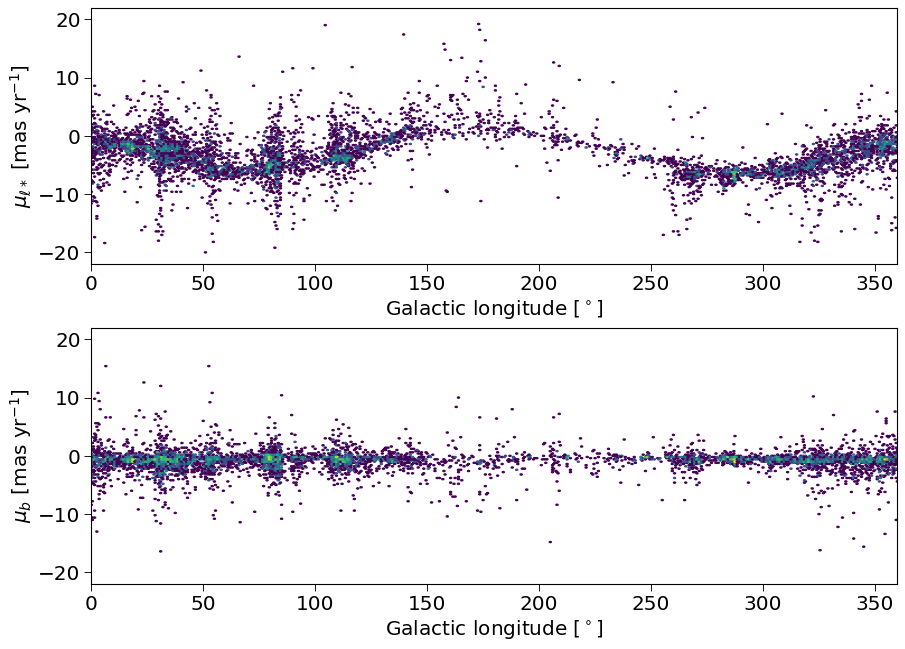

In [13]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

plt.savefig('ostar-pml-pmb-vs-galon.png')

plt.show()

## Set up the STAN model

In [14]:
nsources = oba_subsample['ra'].size
print(f"Number of sources in sample: {nsources}")

oba_data = {'N': nsources, 
            'galon': np.deg2rad(oba_subsample['l']).tolist(), 
            'galat': np.deg2rad(oba_subsample['b']).tolist(),
            'pml_obs': oba_subsample['pml'].tolist(),
            'pml_obs_unc': oba_subsample['pml_error'].tolist(),
            'pmb_obs': oba_subsample['pmb'].tolist(),
            'pmb_obs_unc': oba_subsample['pmb_error'].tolist(),
            'pml_pmb_corr': oba_subsample['pml_pmb_corr'].tolist(),
            'plx_obs': oba_subsample['parallax'].tolist(),
            'Rsun': Rsun.value,
            'Zsun':zsun.value
            }
with open('oba.data.json', 'w') as fp:
    ujson.dump(oba_data, fp)
    fp.close()

bp2010_model = {'stanfile':'mwdisk-bp2010-model.stan', 
               'npars':9,
               'parnames':['Vcirc_sun', 'hbp', 'pbp', 'Vsun_pec_x', 'Vsun_pec_y', 'Vsun_pec_z', 'vdispR', 'vdispPhi', 'vdispZ'],
               'labels':[r'$V_{\mathrm{circ},\odot}}$', r'$h$', r'$p$', r'$V_{X,\odot}(\mathrm{pec})$', r'$V_{Y,\odot}(\mathrm{pec})$', 
                         r'$V_{Z,\odot}(\mathrm{pec})$', r'$\sigma_{v,R}$', r'$\sigma_{v,\phi}$', r'$\sigma_{v,z}$'], 
               'inits':{'Vcirc_sun':220.0, 'hbp':4.0, 'pbp':0.0, 'Vsun_pec_x':11.1, 'Vsun_pec_y':12.24, 'Vsun_pec_z':7.25, 'vdispR':10.0, 'vdispPhi':10.0, 'vdispZ':10.0},
               'best_params':{'Vcirc_sun':np.nan, 'hbp':np.nan, 'pbp':np.nan, 'Vsun_pec_x':np.nan, 'Vsun_pec_y':np.nan, 'Vsun_pec_z':np.nan, 
                              'vdispR':np.nan, 'vdispPhi':np.nan, 'vdispZ':np.nan}
              }

stan_model = bp2010_model

Number of sources in sample: 3000


## Sample posterior

Feed the Ostar proper motion and parallax data to the Stan model and sample the posterior for the Milky Way parameters.

In [15]:
oba_stan = os.path.join(os.getcwd(), stan_model['stanfile'])
set_cmdstan_path(os.path.join('C:/Users/rjrri/.cmdstan/', 'cmdstan-2.31.0'))
oba_data_path = os.path.join(os.getcwd(), 'oba.data.json')

nwarmup = 500
nsampling = 1000
nchains = 4

oba_model = CmdStanModel(stan_file=oba_stan)
oba_fit = oba_model.sample(chains=nchains, iter_warmup=nwarmup, iter_sampling=nsampling, thin=1, data=oba_data_path, save_warmup=False, show_progress=True, 
                          output_dir=fit_save_location)
#oba_fit = oba_model.sample(chains=4, inits=stan_model['inits'], iter_warmup=500, iter_sampling=1000, thin=1, 
#                           data=oba_data_path, save_warmup=False, show_progress='notebook')

18:41:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:15:08 - cmdstanpy - INFO - CmdStan done processing.
19:15:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/

In [16]:
print(' ')

In [8]:
import winsound
frequency = 1000  # Set Frequency To 2500 Hertz
duration = 5000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

## Alternatively reading in earlier produced fits

In [7]:
oba_stan = os.path.join(os.getcwd(), stan_model['stanfile'])
set_cmdstan_path(os.path.join('C:/Users/rjrri/.cmdstan/', 'cmdstan-2.31.0'))
oba_data_path = os.path.join(os.getcwd(), 'oba.data.json')

nwarmup = 500
nsampling = 1000
nchains = 4

oba_model = CmdStanModel(stan_file=oba_stan)

# Choice of stars
filter_of_choice = "O"

fit_save_location = os.path.join(os.getcwd(), 'fitfiles', filter_of_choice)

oba_fit = from_csv(path=fit_save_location)
print(fit_save_location[-len(filter_of_choice):])

16:04:27 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 16 divergent transitions (1.6%)
	Use function "diagnose()" to see further information.


oba


## Summarize the fit results

Note this can take a while as very large CSV files have to be read into memory first.

In [8]:
print(oba_fit.diagnose())

Processing csv files: C:\Users\rjrri\Documents\Universiteit\First project\milkyway-rotation-curve_fork\fitfiles\oba\mwdisk-bp2010-model-20230611171943_1.csv, C:\Users\rjrri\Documents\Universiteit\First project\milkyway-rotation-curve_fork\fitfiles\oba\mwdisk-bp2010-model-20230611171943_2.csv, C:\Users\rjrri\Documents\Universiteit\First project\milkyway-rotation-curve_fork\fitfiles\oba\mwdisk-bp2010-model-20230611171943_3.csv, C:\Users\rjrri\Documents\Universiteit\First project\milkyway-rotation-curve_fork\fitfiles\oba\mwdisk-bp2010-model-20230611171943_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
16 of 4000 (0.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler tran

In [9]:
# Summary from Brown's github results
oba_fit.summary()[0:stan_model['npars']+1]

Mean      MCSE    StdDev           5%          50%  \
lp__       -3441.310000  0.060747  2.241780 -3445.560000 -3440.930000   
Vcirc_sun    231.664000  0.024939  1.549830   229.103000   231.656000   
hbp            4.773510  0.007166  0.229188     4.367730     4.806150   
pbp           -0.896447  0.002149  0.068428    -0.990473    -0.905018   
Vsun_pec_x     9.043030  0.007482  0.389867     8.409740     9.045220   
Vsun_pec_y    10.738900  0.010539  0.435377    10.027600    10.745800   
Vsun_pec_z     8.024070  0.002093  0.126141     7.817080     8.022480   
vdispR        17.310300  0.006942  0.350864    16.740000    17.301700   
vdispPhi      12.046800  0.006813  0.347816    11.494900    12.036500   
vdispZ         7.195810  0.001794  0.096275     7.037800     7.194560   

                    95%    N_Eff   N_Eff/s     R_hat  
lp__       -3438.350000  1361.89  0.293890  0.999956  
Vcirc_sun    234.233000  3862.05  0.833413  0.999340  
hbp            5.088940  1022.76  0.220707  1.008970  
pbp           -0.774626  1014.00  0.218817  1.008710  
Vsun_pec_x     9.691060  2715.47  0.585986  1.000320  
Vsun_pec_y    11.464000  1706.74  0.368307  1.003860  
Vsun_pec_z     8.236470  3631.65  0.783695  0.999426  
vdispR        17.898600  2554.28  0.551202  1.001040  
vdispPhi      12.626500  2606.61  0.562495  1.000440  
vdispZ         7.354830  2878.59  0.621188  0.999256

In [8]:
# Summary from my results
oba_fit.summary()[0:stan_model['npars']+1]

Mean      MCSE    StdDev           5%          50%  \
lp__       -5690.810000  0.051079  2.195860 -5694.810000 -5690.460000   
Vcirc_sun    235.872000  0.027898  1.780060   232.925000   235.880000   
hbp            4.708590  0.010444  0.422684     3.996270     4.715250   
pbp           -0.686761  0.003127  0.129037    -0.905173    -0.683905   
Vsun_pec_x    11.031400  0.008531  0.513512    10.179800    11.037700   
Vsun_pec_y    10.443200  0.013919  0.692092     9.312050    10.433200   
Vsun_pec_z     7.771410  0.003883  0.216667     7.415310     7.771060   
vdispR        19.929000  0.006816  0.403752    19.253600    19.929600   
vdispPhi      18.198100  0.007063  0.433518    17.492400    18.188700   
vdispZ        11.478900  0.002267  0.148633    11.223900    11.478300   

                    95%    N_Eff   N_Eff/s     R_hat  
lp__       -5687.870000  1848.06  0.313819  1.001280  
Vcirc_sun    238.801000  4071.21  0.691333  0.999884  
hbp            5.393690  1637.98  0.278145  1.000890  
pbp           -0.474704  1702.70  0.289136  1.000520  
Vsun_pec_x    11.875800  3623.49  0.615306  0.999997  
Vsun_pec_y    11.558300  2472.42  0.419842  1.001780  
Vsun_pec_z     8.126880  3113.64  0.528727  0.999466  
vdispR        20.594800  3508.48  0.595776  1.000250  
vdispPhi      18.923600  3766.85  0.639650  0.999483  
vdispZ        11.723300  4297.45  0.729750  0.999243

In [8]:
# Summary from my results: controle 01-08-23    Verouderd!
oba_fit.summary()[0:stan_model['npars']+1]

Mean      MCSE    StdDev           5%          50%  \
lp__       -3441.310000  0.060747  2.241780 -3445.560000 -3440.930000   
Vcirc_sun    231.664000  0.024939  1.549830   229.103000   231.656000   
hbp            4.773510  0.007166  0.229188     4.367730     4.806150   
pbp           -0.896447  0.002149  0.068428    -0.990473    -0.905018   
Vsun_pec_x     9.043030  0.007482  0.389867     8.409740     9.045220   
Vsun_pec_y    10.738900  0.010539  0.435377    10.027600    10.745800   
Vsun_pec_z     8.024070  0.002093  0.126141     7.817080     8.022480   
vdispR        17.310300  0.006942  0.350864    16.740000    17.301700   
vdispPhi      12.046800  0.006813  0.347816    11.494900    12.036500   
vdispZ         7.195810  0.001794  0.096275     7.037800     7.194560   

                    95%    N_Eff   N_Eff/s     R_hat  
lp__       -3438.350000  1361.89  0.293890  0.999956  
Vcirc_sun    234.233000  3862.05  0.833413  0.999340  
hbp            5.088940  1022.76  0.220707  1.008970  
pbp           -0.774626  1014.00  0.218817  1.008710  
Vsun_pec_x     9.691060  2715.47  0.585986  1.000320  
Vsun_pec_y    11.464000  1706.74  0.368307  1.003860  
Vsun_pec_z     8.236470  3631.65  0.783695  0.999426  
vdispR        17.898600  2554.28  0.551202  1.001040  
vdispPhi      12.626500  2606.61  0.562495  1.000440  
vdispZ         7.354830  2878.59  0.621188  0.999256

## Plot the values of the MCMC chains vs iteration number

The burn-in samples have already been discarded.

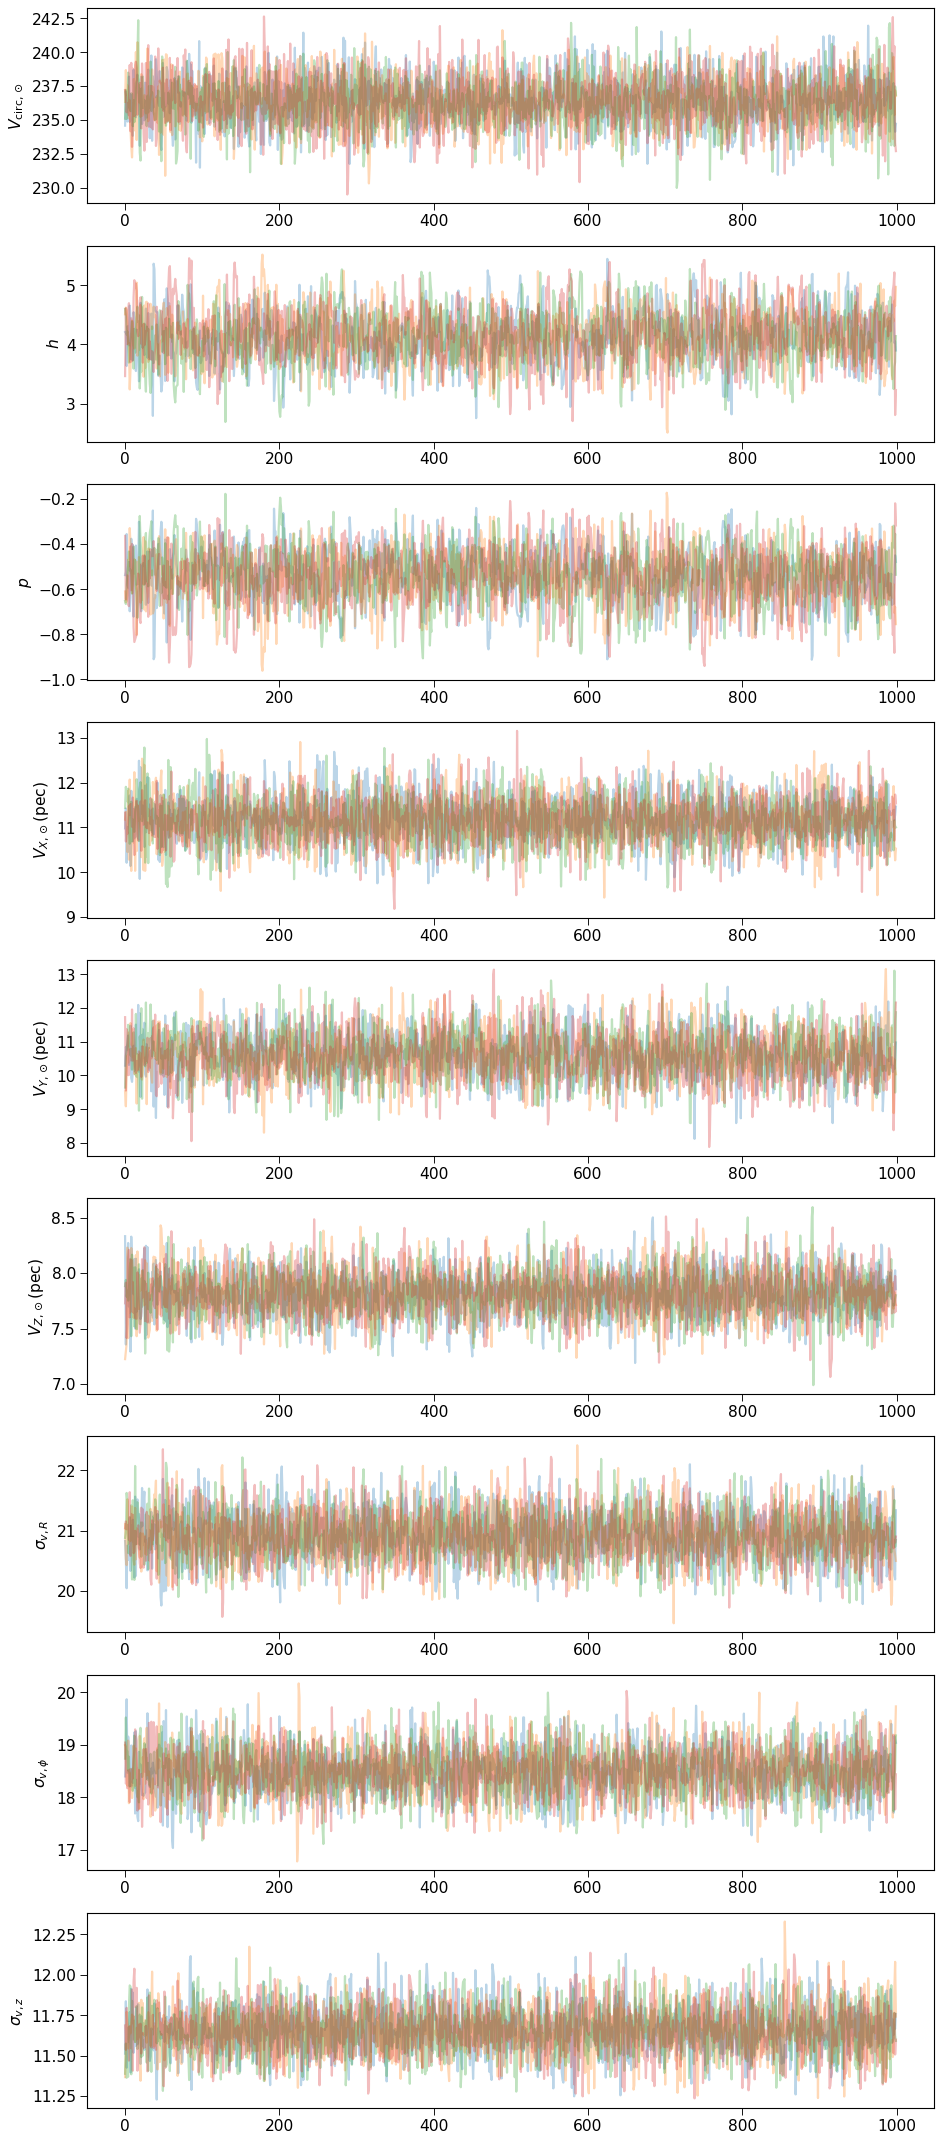

In [17]:
useagab(usetex=False, fontfam='sans-serif', fontsize=14, ncolors=10)

fig, axes = plt.subplots(ncols=1, nrows=stan_model['npars'], tight_layout=True, figsize=(12,3*stan_model['npars']))

for i, lab in zip(range(stan_model['npars']), stan_model['labels']):
    axes[i].plot(oba_fit.draws()[:,:,7+i], alpha=0.3)
    axes[i].set_ylabel(lab)

plt.show()

## Make a corner plot of the posterior samples

Vcirc_sun = 236.4+1.9-1.8
hbp = 4.1+0.4-0.4
pbp = -0.5+0.1-0.1
Vsun_pec_x = 11.2+0.5-0.5
Vsun_pec_y = 10.6+0.7-0.7
Vsun_pec_z = 7.8+0.2-0.2
vdispR = 20.9+0.4-0.4
vdispPhi = 18.5+0.5-0.5
vdispZ = 11.7+0.2-0.1


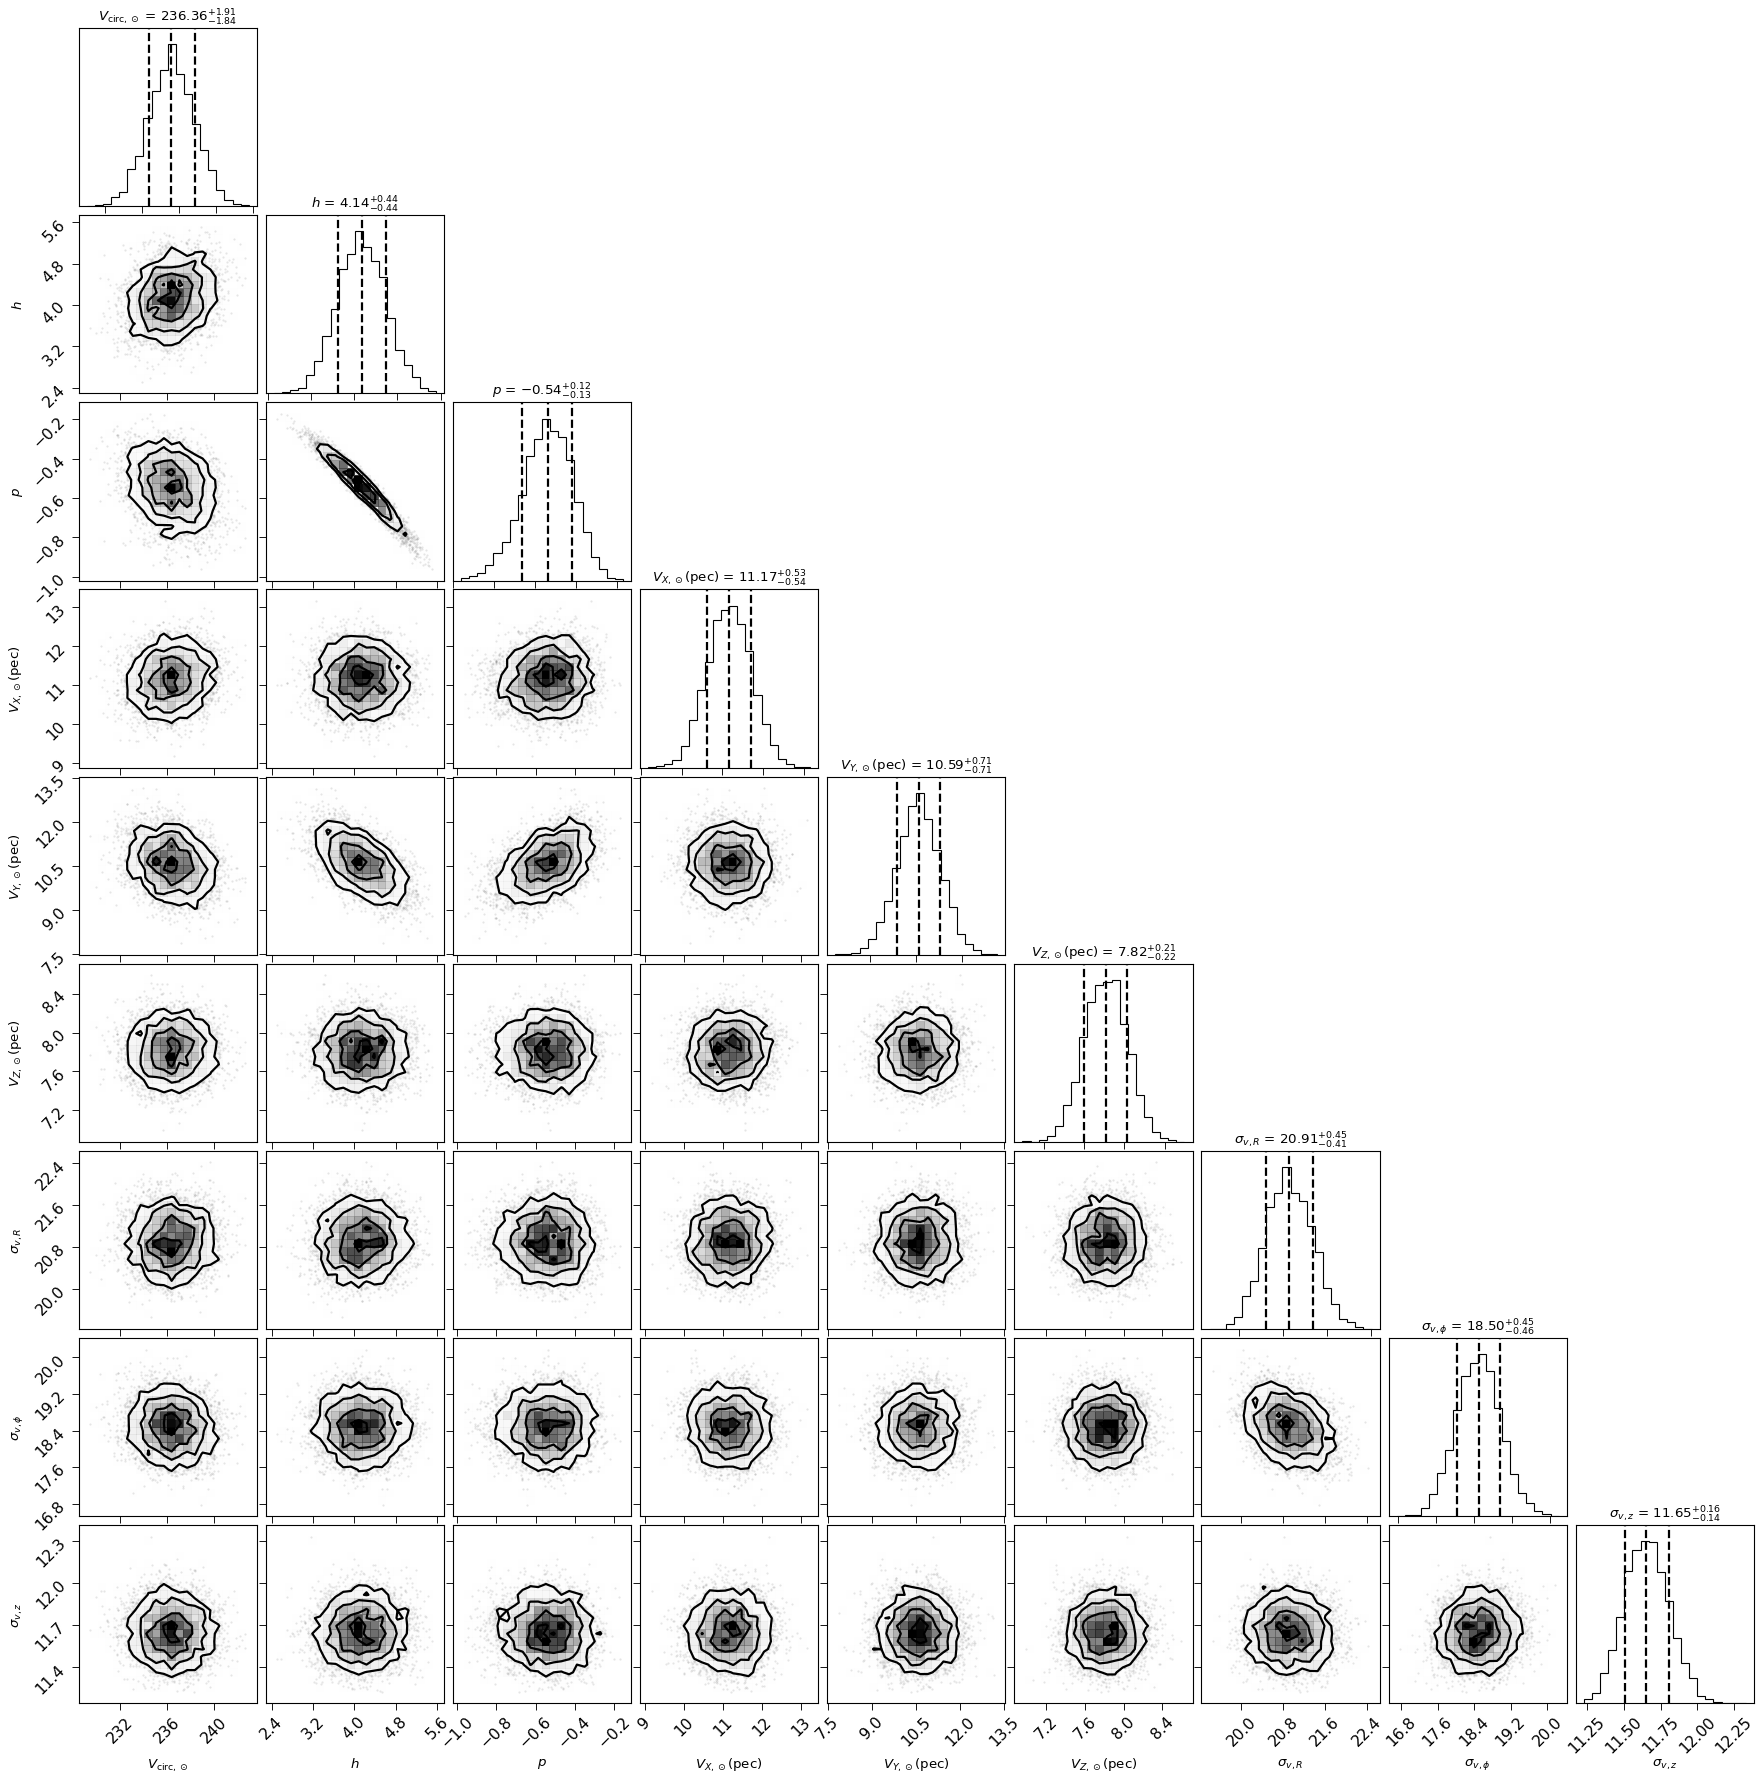

In [18]:
for par in stan_model['parnames']:
    vals = oba_fit.stan_variable(par)
    stan_model['best_params'][par] = np.median(vals)
    q1, q2, q3 = scap(vals, [16, 50, 84])
    print(f"{par} = {q2:.1f}+{q3-q2:.1f}-{q2-q1:.1f}")
    
sample_lists = []
for i, par in zip(range(7, 7+stan_model['npars']), stan_model['parnames']):
    sample_lists.append(oba_fit.draws()[:,:,i].flatten())
samples = np.vstack(sample_lists).transpose()
                         
useagab(usetex=False, fontfam='sans-serif', fontsize=14, ncolors=10)

figcorner = plt.figure(figsize=(2.5*stan_model['npars'],2.5*stan_model['npars']))
corner.corner(
    samples, labels=stan_model['labels'], 
    label_kwargs={"fontsize":12}, title_kwargs={"fontsize": 12},
    truth_color='r', quantiles=[0.16,0.50,0.84], show_titles=True, fig=figcorner
)
plt.show()

## Sgr A* proper motion (assuming no intrinsic motion for this source) and Oort constants

In [19]:
sunpos = np.array([-Rsun.value, 0, zsun.value])*u.kpc
vsunpeculiar = np.array([stan_model['best_params']['Vsun_pec_x'], stan_model['best_params']['Vsun_pec_y'], stan_model['best_params']['Vsun_pec_z']])*u.km/u.s
vcircsun = stan_model['best_params']['Vcirc_sun']
hbp = stan_model['best_params']['hbp']
pbp = stan_model['best_params']['pbp']

diskmodel_best = DiskKinematicModel(BrunettiPfennigerRotationCurve(vcircsun, Rsun.value, hbp, pbp), sunpos, vsunpeculiar)

In [20]:
vsunx_samples = oba_fit.draws()[:,:,9].flatten()
vsuny_samples = oba_fit.draws()[:,:,10].flatten()+oba_fit.draws()[:,:,7].flatten()
vsunz_samples = oba_fit.draws()[:,:,11].flatten()
vsunvec_samples = np.vstack([vsunx_samples, vsuny_samples, vsunz_samples])

vcircsun_samples = oba_fit.draws()[:,:,7].flatten()
h_samples = oba_fit.draws()[:,:,8].flatten()
p_samples = oba_fit.draws()[:,:,9].flatten()
#vsun_circ_samples = v0_samples*Rsun.value/h_samples*(1+(Rsun.value/h_samples)**2)**((p_samples-2)/4)

ra_sgr = (17.0+45.0/60.0+40.0409/3600.0)*15
dec_sgr = -29 - 28.118/2300
l_sgr, b_sgr = ct.transform_sky_coordinates(np.deg2rad(ra_sgr), np.deg2rad(dec_sgr))
print(np.rad2deg(l_sgr)-360, np.rad2deg(b_sgr))

p_sgr = np.array([-np.sin(l_sgr), np.cos(l_sgr), 0.0])
q_sgr = np.array([-np.sin(b_sgr)*np.cos(l_sgr), -np.sin(b_sgr)*np.sin(l_sgr), np.cos(b_sgr)])

mu_sgr_xy_samples = -np.dot(p_sgr, vsunvec_samples)/(Rsun*au_km_year_per_sec).value
mu_sgr_z_samples = -np.dot(q_sgr, vsunvec_samples)/(Rsun*au_km_year_per_sec).value
mu_sgr_xy = np.median(mu_sgr_xy_samples)
mu_sgr_xy_rse = rse(mu_sgr_xy_samples)
mu_sgr_z = np.median(mu_sgr_z_samples)
mu_sgr_z_rse = rse(mu_sgr_z_samples)

print(f"mu_sgr_xy = {mu_sgr_xy:.2f}  +/- {mu_sgr_xy_rse:.3f}")
print(f"mu_sgr_z = {mu_sgr_z:.2f}  +/- {mu_sgr_z_rse:.3f}")

oortA_samples, oortB_samples = BrunettiPfennigerRotationCurve.oort_ab_static(Rsun.value, vcircsun_samples, h_samples, p_samples)
oortAminB_samples = oortA_samples - oortB_samples
oortA = np.median(oortA_samples)
oortA_rse = rse(oortA_samples)
oortB = np.median(oortB_samples)
oortB_rse = rse(oortB_samples)
oortAminB = np.median(oortAminB_samples)
oortAminB_rse = rse(oortAminB_samples)

print(f"Oort A = {oortA:.2f}  +/- {oortA_rse:.3f}")
print(f"Oort B = {oortB:.2f}  +/- {oortB_rse:.3f}")
print(f"Oort A-B = {oortAminB:.2f}  +/- {oortAminB_rse:.3f}")

-0.05951722261414716 -0.04846468783278978
mu_sgr_xy = -6.31  +/- 0.052
mu_sgr_z = -0.27  +/- 0.018
Oort A = 14.52  +/- 0.256
Oort B = -14.04  +/- 0.196
Oort A-B = 28.56  +/- 0.226


## Model check through predictive posterior

In [21]:
idata = az.from_cmdstanpy(
    posterior=oba_fit,
    posterior_predictive=['pred_pml', 'pred_pmb'],
    observed_data={'pml_obs': oba_data['pml_obs'],
                   'pmb_obs': oba_data['pmb_obs']},
    coords={'nsources': np.arange(oba_data['N'])},
    dims={
        'pml_obs': ['nsources'],
        'pmb_obs': ['nsources'],
        'pred_pml': ['nsources'],
        'pred_pmb': ['nsources'],
    },
)

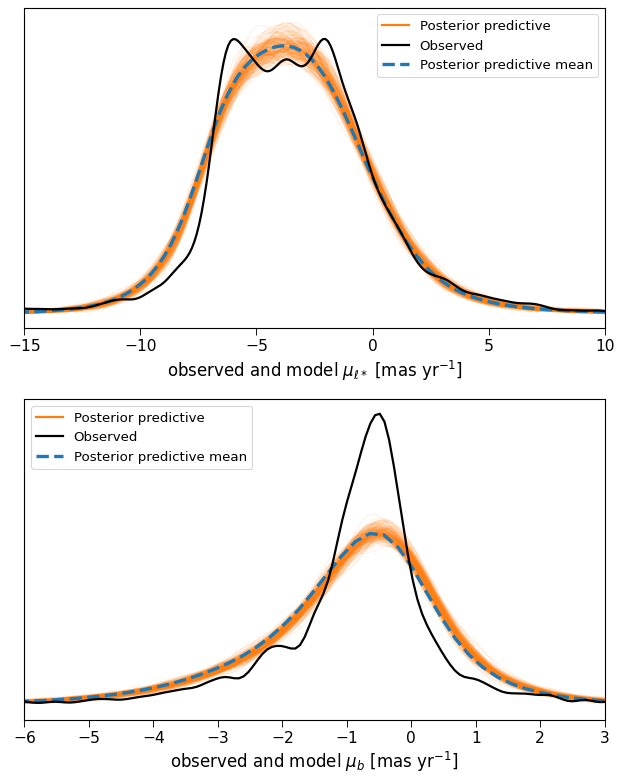

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(8, 2*5), tight_layout=True)
az.plot_ppc(idata, ax=axes, data_pairs={'pml_obs':'pred_pml', 'pmb_obs':'pred_pmb'}, 
            num_pp_samples=200, alpha=0.1, colors=['C1', 'k', 'C0'])
for ax in axes:
    ax.legend(fontsize=12)
    #apply_tufte(ax)
axes[0].set_xlim(-15,10)
axes[1].set_xlim(-6,3)
axes[0].set_xlabel(r'observed and model $\mu_{\ell*}$ [mas yr$^{-1}$]')
axes[1].set_xlabel(r'observed and model $\mu_b$ [mas yr$^{-1}$]')

# plt.savefig('ostars_pms_posterior_predictive.png')

plt.show()

[226.93756198 225.94124272 236.8122472  ... 255.07484278 230.90257474
 244.16865884] km / s


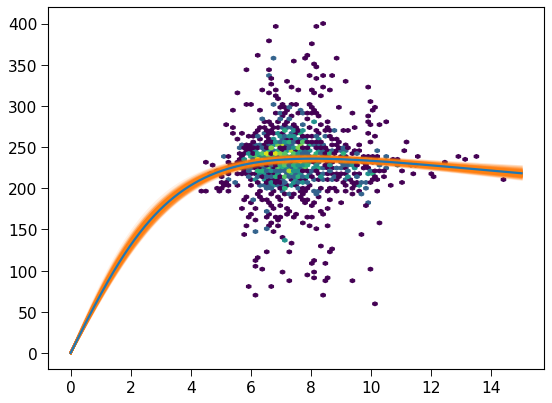

In [15]:
icrs_coords = ICRS(
    ra=(obatable['ra'][hasrvs].data * u.deg).to(u.rad),
    dec=(obatable['dec'][hasrvs].data * u.deg).to(u.rad),
    distance=(1000 / obatable['parallax'][hasrvs].data) * u.pc,
    pm_ra_cosdec=obatable['pmra'][hasrvs].data * u.mas / u.yr,
    pm_dec=obatable['pmdec'][hasrvs].data * u.mas / u.yr,
    radial_velocity=obatable['radial_velocity'][hasrvs].data * u.km / u.s,
)

_, _, gc_cyl = transform_to_galactic(
    icrs_coords,
    galcendist=Rsun,
    sunheight=zsun,
    vcircsun=vcircsun*u.km/u.s,
    vsunpec=vsunpeculiar,
)

rotcur = lambda x, h, p : x/h * np.power(1+(x/h)**2, (p-2)/4)

fig, axvphi = plt.subplots(1, 1, figsize=(8,6))

vphi_from_fit = -(gc_cyl.d_phi.to(u.rad / u.yr) / u.rad * gc_cyl.rho).to(u.km / u.s)
print(vphi_from_fit)

axvphi.hexbin(gc_cyl.rho.to(u.kpc), vphi_from_fit, mincnt=1, bins='log', extent=[0,15,0,400])

rcyl = np.linspace(0,15,1000)

inds = np.random.choice(p_samples.size, size=200, replace=False)
for i in inds:
    v0 = vcircsun_samples[i]/rotcur(Rsun.value, h_samples[i], p_samples[i])
    axvphi.plot(rcyl, v0*rotcur(rcyl, h_samples[i], p_samples[i]), c='C1', alpha=0.1)

v0 = vcircsun/rotcur(Rsun.value, hbp, pbp)
axvphi.plot(rcyl, v0*rotcur(rcyl, hbp, pbp), c='C0', lw=2)

plt.show()

## Compare model predictions and observations in the proper motion vs longitude plots

Show both a model prediction for stars at a fixed distance from the sun and simulated proper motion data, using the simulated data ('generated quantities') from the STAN model.

1921.9507577528352 pc


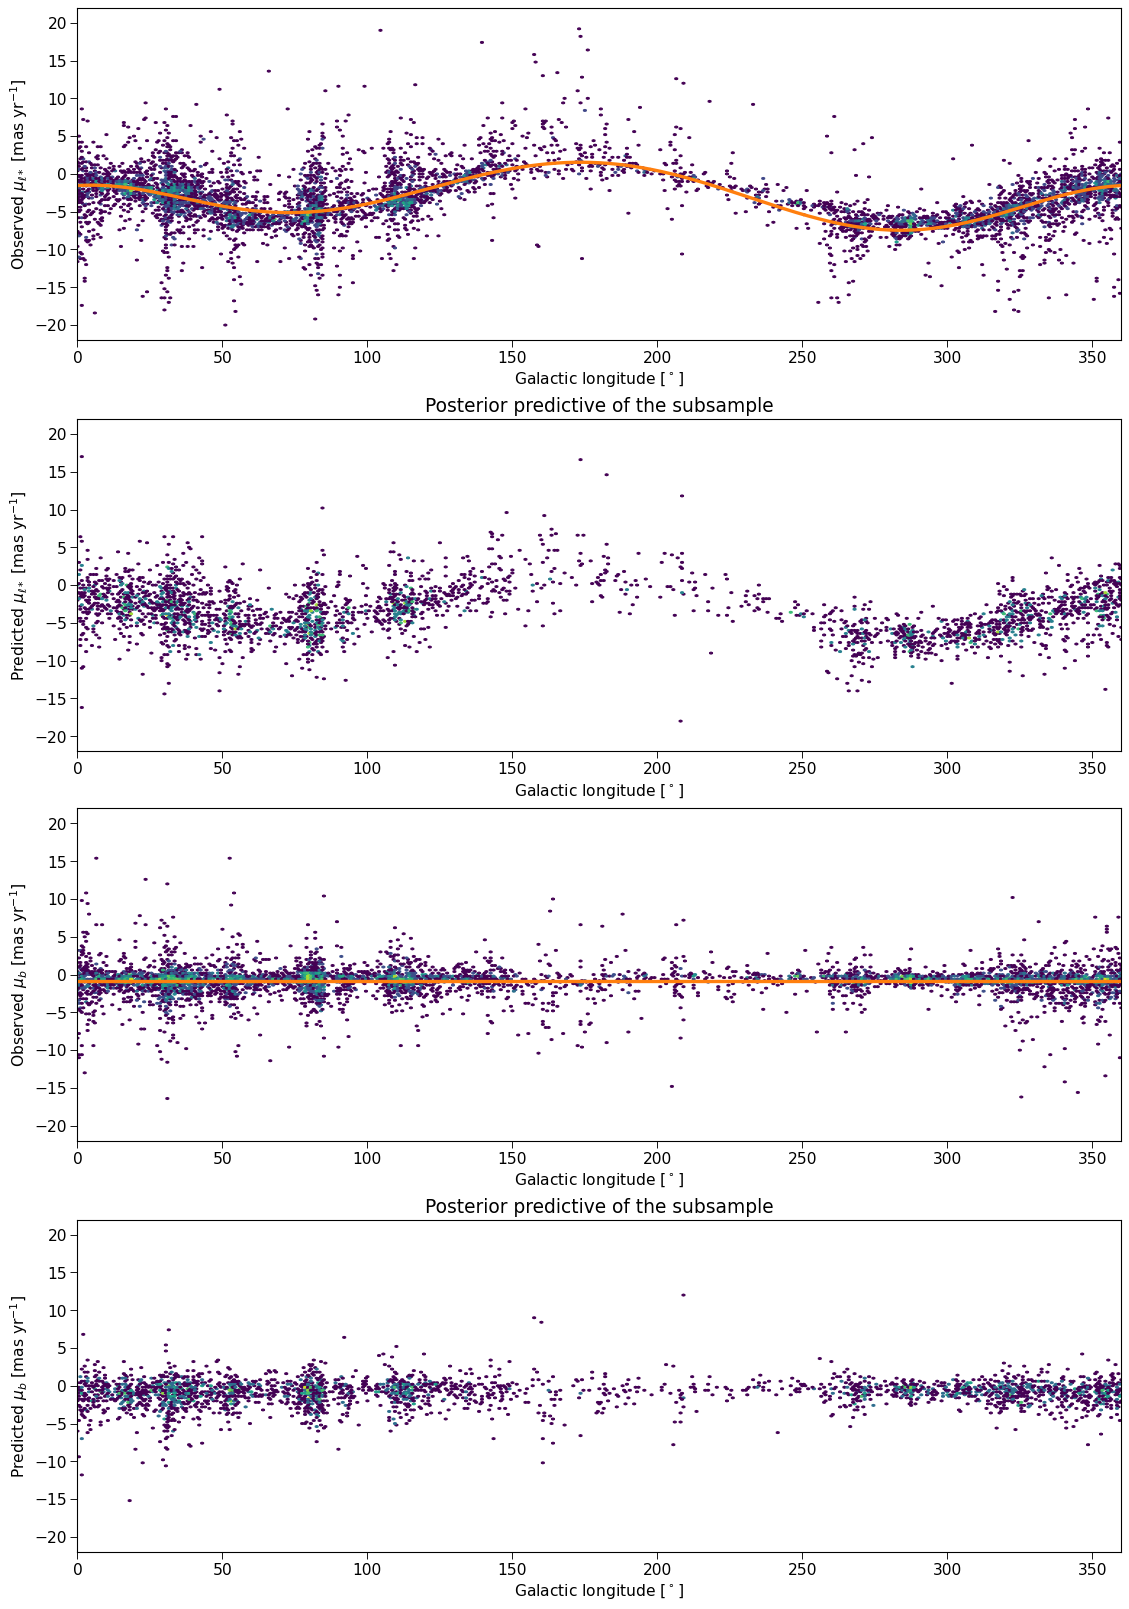

In [16]:
galon = np.linspace(0,360,361)*u.deg

median_dist = 1000/np.median(obatable['parallax'][sample_filter])
print(median_dist, 'pc')

#pml_model, pmb_model, vrad_model = diskmodel_flat.observables(1000.0/obatable['parallax'][sample_filter].value*u.pc, 
#                                                              obatable['l'][sample_filter]*u.deg, obatable['b'][sample_filter]*u.deg)

chain = np.random.choice(nchains)
mcsample = np.random.choice(nsampling)

fig=plt.figure(constrained_layout=True, figsize=(14,4*5))

gs = GridSpec(4, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'Observed $\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmul_model = fig.add_subplot(gs[1,0])
#im_lmul_model = ax_lmul_model.hexbin(obatable['l'][sample_filter], pml_model, 
#                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmul_model = ax_lmul_model.hexbin(oba_subsample['l'], idata.posterior_predictive['pred_pml'][chain, mcsample, :], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul_model.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul_model.set_ylabel(r'Predicted $\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul_model.set_xlim(0,360)
ax_lmul_model.set_title("Posterior predictive of the subsample")

ax_lmub = fig.add_subplot(gs[2,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'Observed $\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

ax_lmub_model = fig.add_subplot(gs[3,0])
#im_lmub_model = ax_lmub_model.hexbin(obatable['l'][sample_filter], pmb_model, 
#                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmub_model = ax_lmub_model.hexbin(oba_subsample['l'], idata.posterior_predictive['pred_pmb'][chain, mcsample, :], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub_model.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub_model.set_ylabel(r'Predicted $\mu_b$ [mas yr$^{-1}$]')
ax_lmub_model.set_xlim(0,360)
ax_lmub_model.set_title("Posterior predictive of the subsample")

for dist in [median_dist]:
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) - np.rad2deg(np.arcsin(zsun.value/dist))*u.deg
    pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
    ax_lmul.plot(galon, pml_model, c='C1', lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmul.plot(galon, vrad_model, c='C1', lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model, c='C1', lw=3)
#     ax_lmub.plot(galon, vrad_model, c='C1', lw=3)

plt.show()

## Overplot model predictions for specific distances on observed proper motions

1921.9507577528352


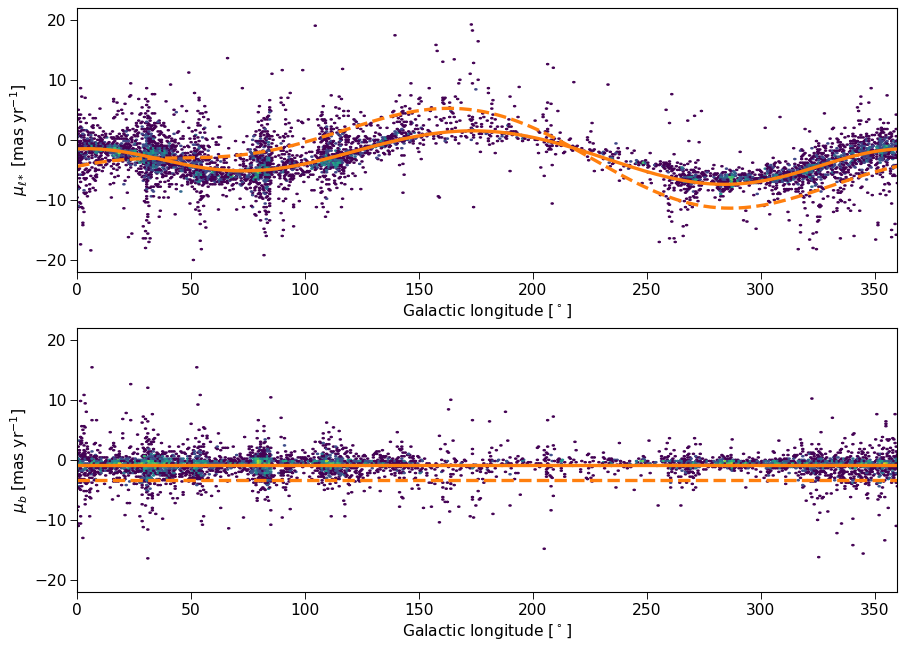

In [17]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

print(median_dist)
for dist, lstyle in zip([500, 2000], ['--C1', '-C1']):
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) - np.rad2deg(np.arcsin(zsun.value/dist))*u.deg
    pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
    ax_lmul.plot(galon, pml_model, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model, lstyle, lw=3)
    
# for dist, lstyle in zip([500, 2000], ['--C9', '-C9']):
#     distance = np.zeros_like(galon.value) + dist*u.pc
#     galat = np.zeros_like(galon.value)# - np.rad2deg(np.arcsin(2000/dist))*u.deg
#     pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
#     ax_lmul.plot(galon, pml_model, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmub.plot(galon, pmb_model, lstyle, lw=3)

plt.savefig('bstar-pml-pmb-vs-galon-plusmodel.png')

plt.show()

## Calculating difference in proper motion

In [18]:
galon = np.array(obatable['l'][sample_filter].tolist())
galat = np.array(obatable['b'][sample_filter].tolist())
print(galon*u.deg)
print(galat)

[120.48696259 275.04787504 190.187781   ... 346.48144011  59.52311748
  58.9277721 ] deg
[ 0.29870646 -1.56659966 -1.98046024 ... -4.21677188 -1.73355572
 -1.05583703]


In [19]:
A = 4.74047  # km s^-1 yr

prop_mot_lon = np.array(obatable['pml'][sample_filter].tolist())
prop_mot_lat = np.array(obatable['pmb'][sample_filter].tolist())
plx = np.array(obatable['parallax'][sample_filter].tolist())
galon = np.array(obatable['l'][sample_filter].tolist())*u.deg
galat = np.array(obatable['b'][sample_filter].tolist())*u.deg

# 𝐱=(1000/𝜛)𝐫+𝐱⊙
rvec = np.array([np.cos(galat)*np.cos(galon), np.cos(galat)*np.sin(galon), np.sin(galat)]).T
print(rvec[1])

# pml_model = np.zeros_like(prop_mot_lon)
# pmb_model = np.zeros_like(prop_mot_lat)
# vrad_model = np.zeros_like(prop_mot_lon)
pml_diff = np.zeros_like(prop_mot_lon)
pmb_diff = np.zeros_like(prop_mot_lat)
distances = np.zeros_like(plx)

# for n in range(len(prop_mot_lon)):
#     # Distance is between sun and star
#     rel_vec = (1000/plx[n])*rvec[n].T   # Multiplication met r gebeurt ook in de observables() function.
# #     print(rel_vec)
# #     xxx
#     distances[n] = np.sqrt(rel_vec[0]*rel_vec[0] + rel_vec[1]*rel_vec[1] + rel_vec[2]*rel_vec[2])#*u.pc
    
# pml_model, pmb_model, vrad_model = diskmodel_best.observables(1000/plx*u.pc, galon, galat)
pml_model, pmb_model, vrad_model = diskmodel_best.observables(1/plx*u.kpc, galon, galat)
print(prop_mot_lon[1])
print(pml_model[1])
pml_diff = prop_mot_lon - pml_model.value
pmb_diff = prop_mot_lat - pmb_model.value

# for n in range(len(prop_mot_lon)):
#     # Kan wsl ook als matrix notatie:
# #     pml_model[n], pmb_model[n], vrad_model[n] = diskmodel_best.observables(distance_n, galon[n], galat[n]) # Werkt wsl niet voor enkele sterren
#     pml_diff[n] = prop_mot_lon[n] - pml_model[n]
#     pmb_diff[n] = prop_mot_lat[n] - pmb_model[n]

[ 0.08795522 -0.9957492  -0.02733892]
-5.550107231546148
-5.4933001480546295 mas / yr


In [20]:
print(galat)
print(np.min(galat), np.max(galat))
print(np.min(galon), np.max(galon))

[ 0.29870646 -1.56659966 -1.98046024 ... -4.21677188 -1.73355572
 -1.05583703] deg
-44.73948846838479 deg 22.70016170306452 deg
0.013374880110830354 deg 359.9858294196504 deg


### Trying to find rough limits of the model values to understand/test behaviour
In first instance, due to a missing unit, the data did not follow the limits. Now it does.

#### For the subsample:

min_dist 141.70827057149117
max_dist 8270.181674223244
med_dist 1921.9507577528352
min_galat -44.73948846838479
max_galat 22.70016170306452


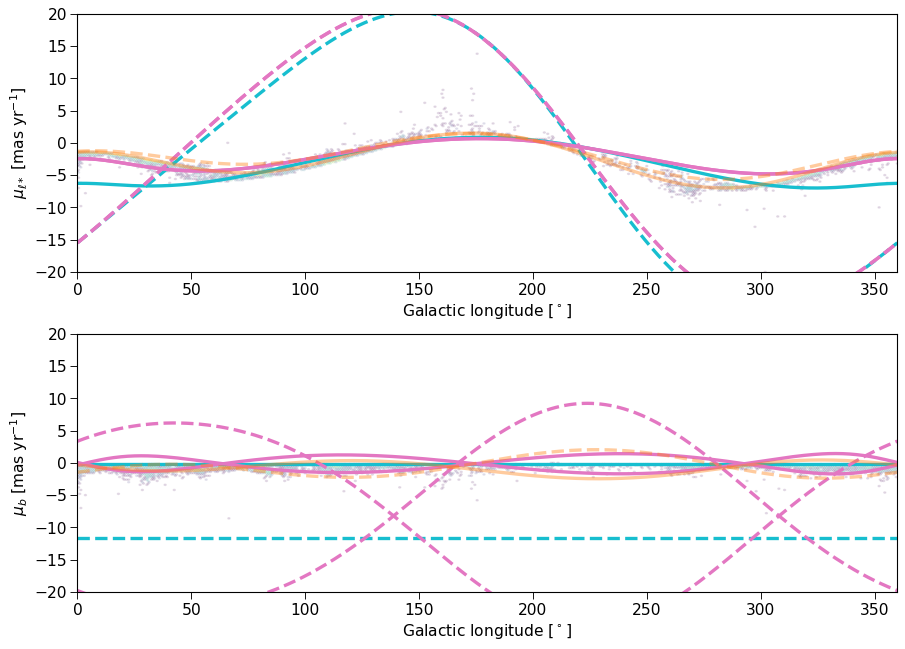

In [21]:
galon = np.linspace(0,360,361)*u.deg
galat = np.array(obatable['b'][sample_filter].tolist())
min_dist = np.min(1000/(obatable['parallax'][sample_filter]))
max_dist = np.max(1000/(obatable['parallax'][sample_filter]))
med_dist = 1000/np.median(obatable['parallax'][sample_filter])
min_galat = np.min(galat)
max_galat = np.max(galat)
min_abs_galat = np.min(np.abs(galat))
max_abs_galat = np.max(np.abs(galat))
print("min_dist", min_dist)
print("max_dist", max_dist)
print("med_dist", med_dist)
print("min_galat", min_galat)
print("max_galat", max_galat)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
# im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], pml_model, 
             gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20], alpha = 0.1)
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
# im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], pmb_model, 
             gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20], alpha = 0.1)
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

# for dist, lstyle in zip([min_dist, max_dist], ['--C9', '-C9']):
#     distance = np.zeros_like(galon.value) + dist*u.pc
#     galat = np.zeros_like(galon.value)# - np.rad2deg(np.arcsin(2000/dist))*u.deg
#     pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galat)
#     if dist != min_dist:
#         ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
#         ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3)

    
# for gallatitude, lstyle in zip([min_galat, max_galat], ['--C1', '-C1']):
#     distance = np.zeros_like(galon.value) + min_dist*u.pc
#     galati = np.zeros_like(galon.value) + gallatitude*u.deg
#     pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galati)
#     ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3)

# for gallatitude, lstyle in zip([min_galat, max_galat], ['--C6', '-C6']):
#     distance = np.zeros_like(galon.value) + max_dist*u.pc
#     galati = np.zeros_like(galon.value) + gallatitude*u.deg
#     pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galati)
#     ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3)

# min absolute galat
for dist, lstyle in zip([min_dist, max_dist], ['--C9', '-C9']):
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) + min_abs_galat*u.deg
    pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galat)
#     if dist != min_dist:
    ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3)
        
# max absolute galat
for dist, lstyle in zip([min_dist, max_dist], ['--C6', '-C6']):
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) + max_abs_galat*u.deg
    galat_neg = np.zeros_like(galon.value) - max_abs_galat*u.deg
    pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galat)
    pml_model_n2, pmb_model_n2, vrad_model_n2 = diskmodel_best.observables(distance, galon, galat_neg)
#     if dist != min_dist:
    ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmul.plot(galon, pml_model_n2, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3)
    ax_lmub.plot(galon, pmb_model_n2, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmul.set_ylim([-20, 20])
    ax_lmub.set_ylim([-20, 20])

# med absolute galat
for gallatitude, lstyle in zip([min_galat, max_galat], ['--C1', '-C1']):
    distance = np.zeros_like(galon.value) + med_dist*u.pc
    galati = np.zeros_like(galon.value) + gallatitude*u.deg
    pml_model_n, pmb_model_n, vrad_model_n = diskmodel_best.observables(distance, galon, galati)
    ax_lmul.plot(galon, pml_model_n, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc', alpha = 0.4)
    ax_lmub.plot(galon, pmb_model_n, lstyle, lw=3, alpha = 0.4)
    

galon = np.array(obatable['l'][sample_filter].tolist())*u.deg
galat = np.array(obatable['b'][sample_filter].tolist())*u.deg
    
# All the model predictions should lie between the max model edges. This is not the case. 
# This means that something goes wrong in creating the model values.
# Leaving away units of degrees for longitudes/latitudes changes the model values. I did not give the values in the 
# real model predictions the units degrees. This might change the predictions correctly.

# This was the solution! The models now roughly follow the restrictions:

## Visualizing calculated model values and substracting them from data

#### First for the subsamples:

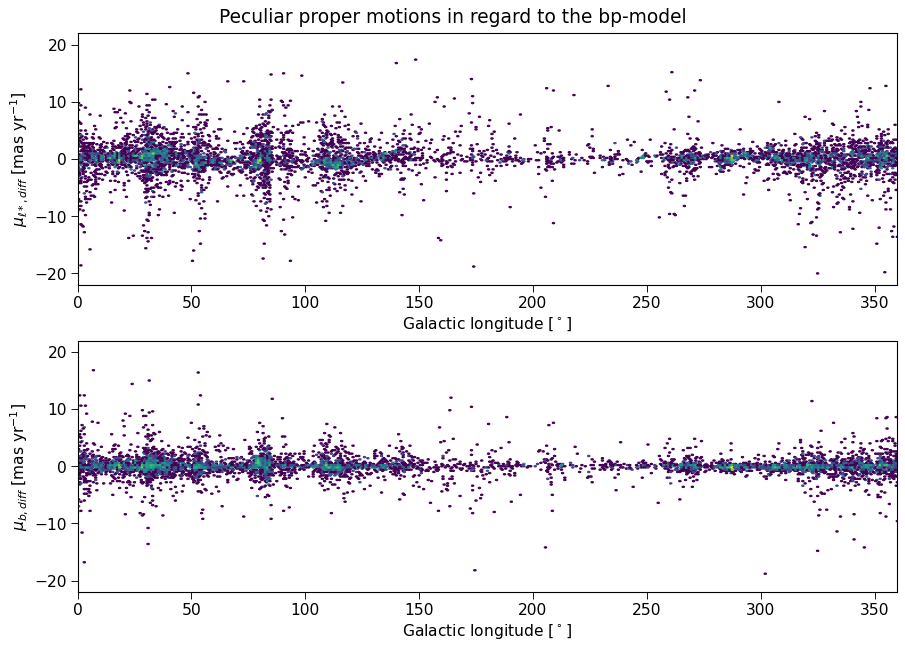

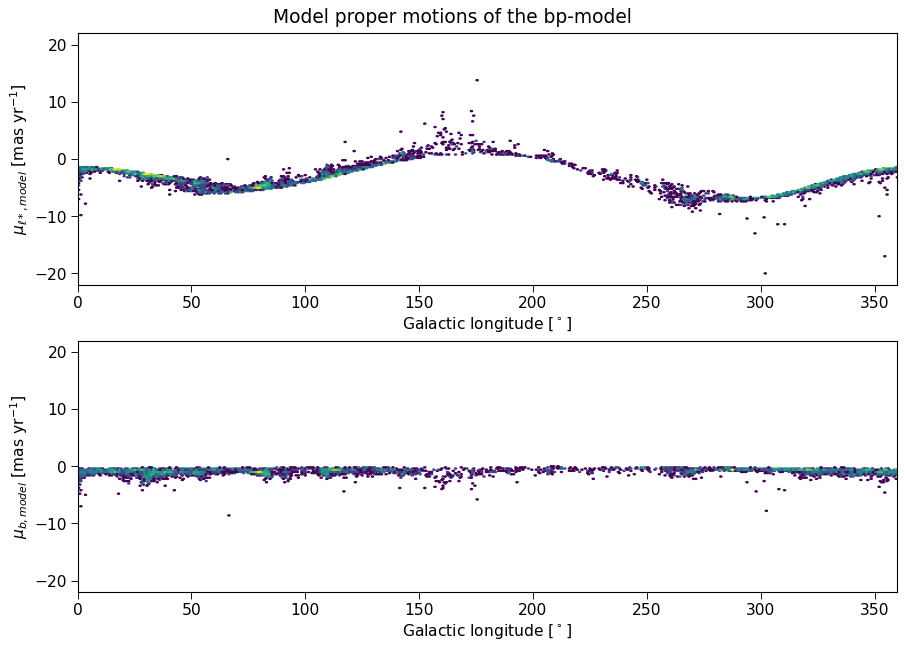

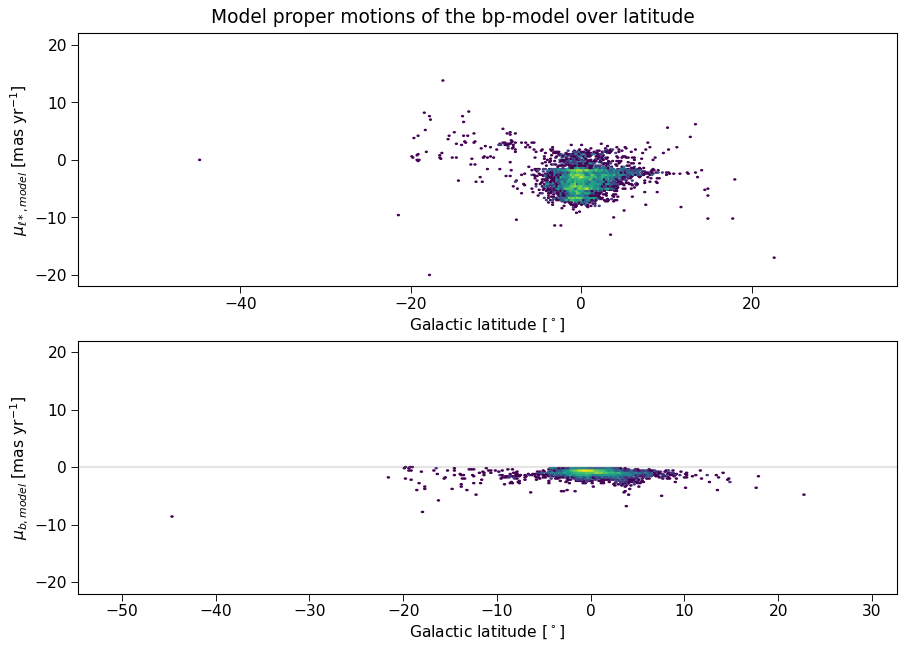

In [22]:
# plt.title(r"Model $\mu_l$")
# plt.scatter(obatable['l'][sample_filter], pml_model, marker='.')
# # plt.xlim(174, 201)
# # plt.ylim(-15, 15)
# plt.xlabel(r'Galactic longitude [$^\circ$]')
# plt.ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# plt.show()

# plt.title(r"Model $\mu_b$")
# plt.scatter(obatable['l'][sample_filter], pmb_model, marker='.')
# # plt.xlim(174, 201)
# # plt.ylim(-10, 10)
# plt.xlabel(r'Galactic longitude [$^\circ$]')
# plt.ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
# plt.show()

# plt.title(r"Model $\mu_l$")
# plt.scatter(obatable['b'][sample_filter], pml_model, marker='.')
# plt.xlim(-25, 25)
# plt.ylim(-25, 25)
# plt.xlabel(r'Galactic latitude [$^\circ$]')
# plt.ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# plt.show()

# plt.title(r"Model $\mu_b$")
# plt.scatter(obatable['b'][sample_filter], pmb_model, marker='.')
# # plt.xlim(174, 201)
# # plt.ylim(-10, 10)
# plt.xlabel(r'Galactic latitude [$^\circ$]')
# plt.ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
# plt.show()

fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions in regard to the bp-model")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], pml_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

plt.savefig('bstar-pml_diff-pmb_diff-vs-galon.png')

# Model
fig2=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig2)
plt.suptitle("Model proper motions of the bp-model")
ax_lmul = fig2.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig2.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)


fig3=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig3)
plt.suptitle("Model proper motions of the bp-model over latitude")
ax_lmul = fig3.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['b'][sample_filter], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10,-20,20])
ax_lmul.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')

ax_lmub = fig3.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['b'][sample_filter], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10,-20,20])
ax_lmub.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
plt.plot([np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10], [0,0], c='gray', alpha = 0.2)
ax_lmub.set_xlim([np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10])
plt.show()

#### Plotting the peculiar proper motions in l and b againts eachother for the subsample

Text(0.5, 0, '$v_{\\ell*}$ [km s$^{-1}$]')

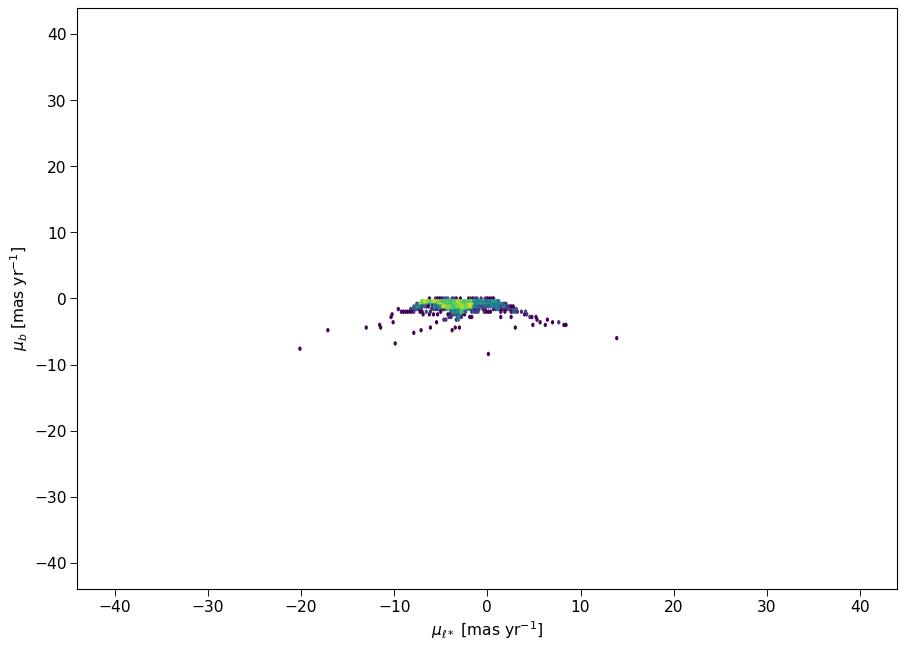

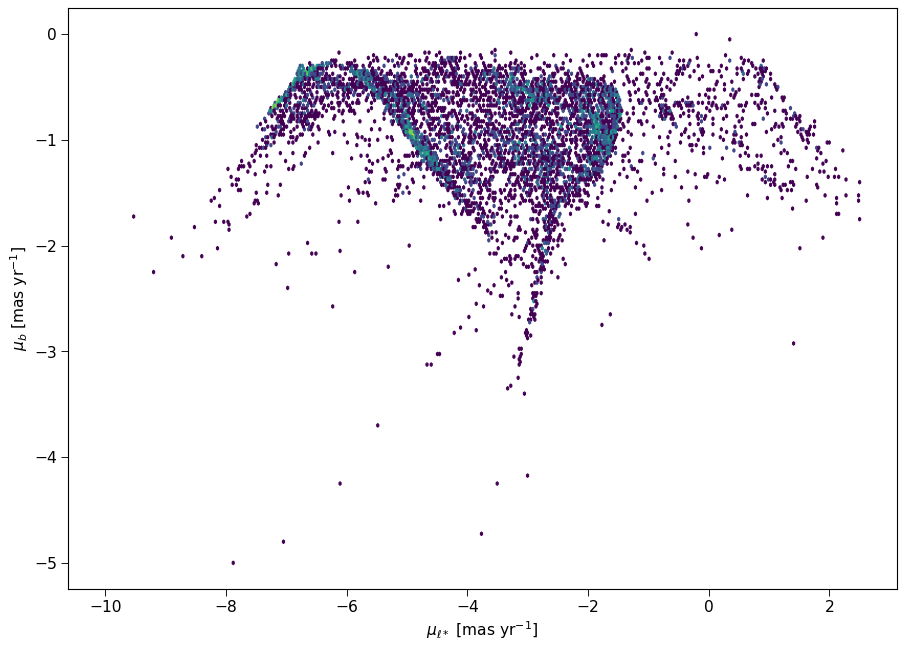

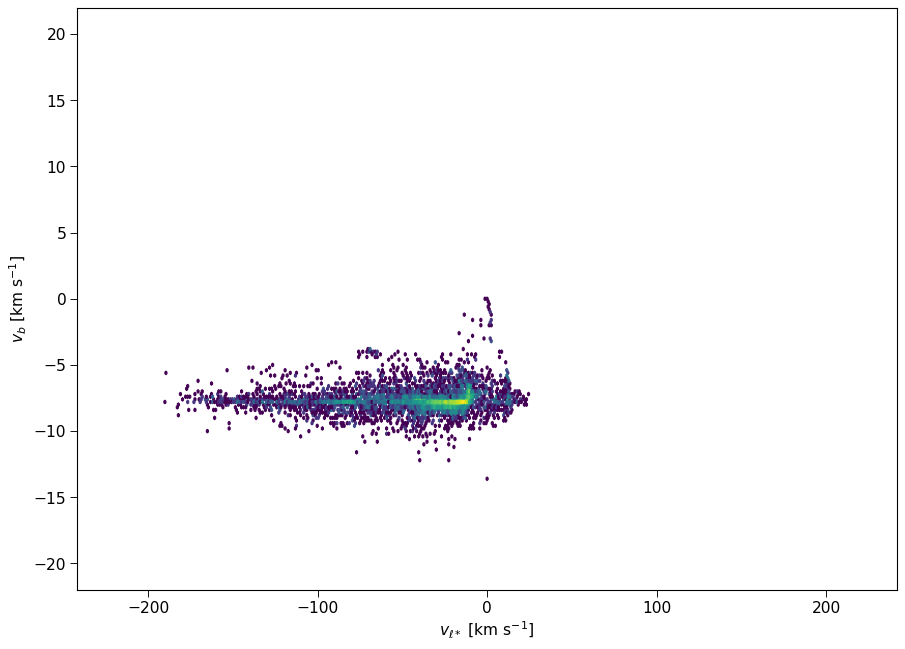

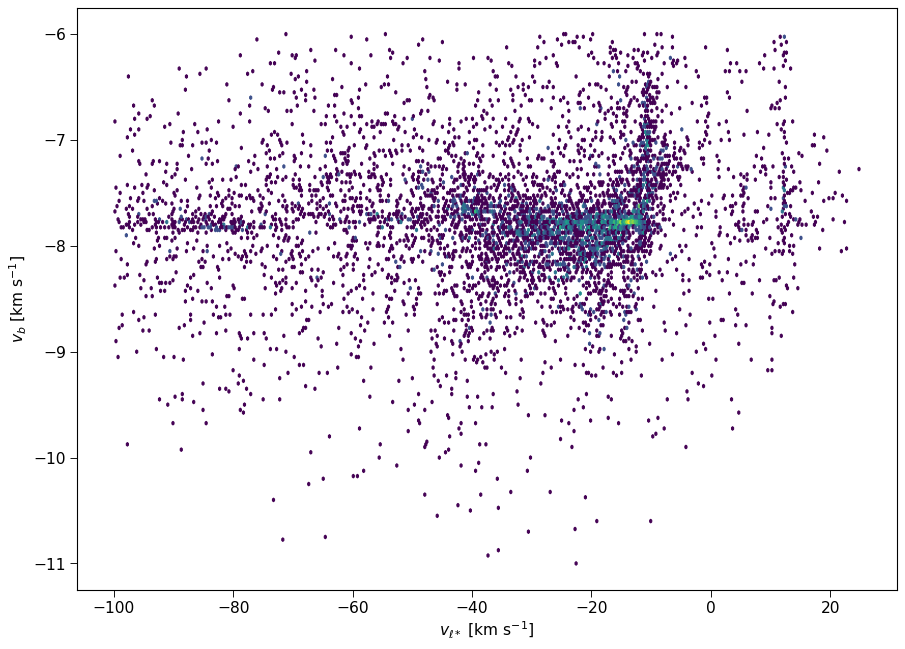

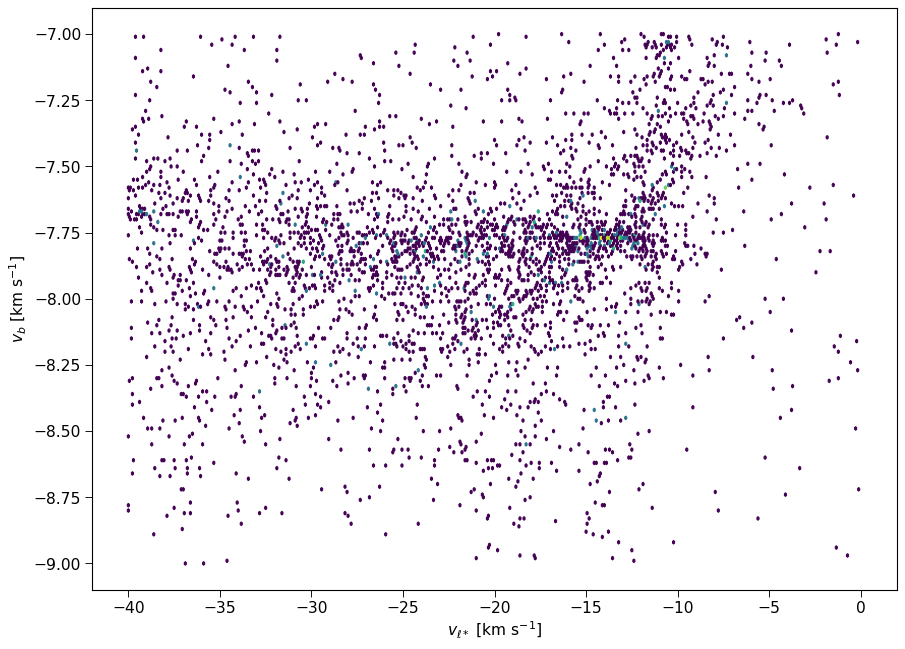

In [23]:
# fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

# gs = GridSpec(2, 1, figure=fig)

# ax_lmul = fig.add_subplot(gs[0,0])
# ax_lmul.scatter(obatable['l'][sample_filter], pml_model, marker='.', alpha = 1, c='orange')

# im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-60,80], alpha = 0.2)
# ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
# ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmul.set_xlim(0,360)

# ax_lmub = fig.add_subplot(gs[1,0])
# ax_lmub.scatter(obatable['l'][sample_filter], pmb_model, marker='.', alpha = 1, c='orange')
# im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20], alpha = 0.2)
# ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
# ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
# ax_lmub.set_xlim(0,360)

plt.show()

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])

ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-10,2.5,-5,0])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

vl_model = A/plx * pml_model
vb_model = A/plx * pmb_model

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-220,220,-20,20])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-100,25,-11,-6])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,0,-9,-7])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


## For the entire dataset (possibly filtered by ...)
#### Calculating model values

In [24]:
# Possibly filtering:

print(len(obatable['pml']))
print(len(obatable['b']))

# 
prop_mot_lon = np.array(obatable['pml'].tolist())
prop_mot_lat = np.array(obatable['pmb'].tolist())
plx = np.array(obatable['parallax'].tolist())
galon = np.array(obatable['l'].tolist())*u.deg
galat = np.array(obatable['b'].tolist())*u.deg
galon_linear = np.linspace(0,360,361)*u.deg

# 𝐱=(1000/𝜛)𝐫+𝐱⊙
rvec = np.array([np.cos(galat)*np.cos(galon), np.cos(galat)*np.sin(galon), np.sin(galat)]).T

pml_model, pmb_model, vrad_model = diskmodel_best.observables(1/plx*u.kpc, galon, galat)

pml_diff = prop_mot_lon - pml_model.value
pmb_diff = prop_mot_lat - pmb_model.value


# galon = np.linspace(0,360,361)*u.deg
# galat = np.array(obatable['b'].tolist())
min_dist = np.min(1000/(obatable['parallax']))
max_dist = np.max(1000/(obatable['parallax']))
med_dist = 1000/np.median(obatable['parallax'])
min_galat = np.min(galat)
max_galat = np.max(galat)
min_abs_galat = np.min(np.abs(galat))
max_abs_galat = np.max(np.abs(galat))
print("min_dist", min_dist)
print("max_dist", max_dist)
print("med_dist", med_dist)
print("min_galat", min_galat)
print("max_galat", max_galat)

3023388
3023388


KeyboardInterrupt: 

In [ ]:
print(diskmodel_best.observables(np.array([1, 2])*u.kpc, np.array([1, 2])*u.deg, np.array([1, 2])*u.deg))

#### Visualizing model values and differences with real values for the entire dataset

In [ ]:
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions in regard to the bp-model")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'], pml_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'], pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

plt.savefig('bstar-pml_diff-pmb_diff-vs-galon.png')

# Model
fig2=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig2)
plt.suptitle("Model proper motions of the bp-model")
ax_lmul = fig2.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig2.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)


fig3=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig3)
plt.suptitle("Model proper motions of the bp-model over latitude")
ax_lmul = fig3.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['b'], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'])-10,np.max(obatable['b'])+10,-20,20])
ax_lmul.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')

ax_lmub = fig3.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['b'], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'])-10,np.max(obatable['b'])+10,-20,20])
ax_lmub.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
plt.plot([np.min(obatable['b'])-10,np.max(obatable['b'])+10], [0,0], c='gray', alpha = 0.2)
ax_lmub.set_xlim([np.min(obatable['b'])-10,np.max(obatable['b'])+10])
plt.show()

#### Plotting the peculiar proper motions in l and b againts eachother for the entire sample

In [ ]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])

ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-10,2.5,-5,2])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-7,-6,-1,1])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


vl_model = A/plx * pml_model
vb_model = A/plx * pmb_model


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(vl_model.value)-10,np.max(vl_model.value)+10,np.min(vb_model.value)-10,np.max(vb_model.value)+10])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-400, 0, 20,150])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-100,25,-11,-6])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,0,-9,-7])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


# Same axes as Zari uses:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb_zariax = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb_zariax = ax_vlb_zariax.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_vlb_zariax.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb_zariax.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_vlb.set_xlim(-40, 40)
# ax_vlb.set_ylim(-40, 40)

### Selecting the loops in the tangential velocity plot

In [ ]:
# vb_min = 30
# vb_max = 145
# vl_min = -340
# vl_max = -25
# oba_vb_filtered = obatable[]
# # skipped for now, because I noticed I was looking at model values instead of the actual differences. 
# # (Might still be interesting though!)

## These were all model proper motions, now the actual differences

In [ ]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_diff, pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])

ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_diff, pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-10,2.5,-5,2])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_mulb = ax_mulb.hexbin(pml_diff, pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-7,-6,-1,1])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


vl_model = A/plx * pml_model
vb_model = A/plx * pmb_model

vl_diff = A/plx * pml_diff
vb_diff = A/plx * pmb_diff


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(vl_diff)-10,np.max(vl_diff)+10,np.min(vb_diff)-10,np.max(vb_diff)+10])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1500, 1000, -1000, 2000])
ax_vlb.set_ylabel(r'$v_{b, pec}b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-250,250,-250,250])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,0,-9,-7])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


# Same axes as Zari uses:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb_zariax = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb_zariax = ax_vlb_zariax.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_vlb_zariax.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb_zariax.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')
# ax_vlb.set_xlim(-40, 40)
# ax_vlb.set_ylim(-40, 40)

### V_diff at longitudes plotted

In [ ]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(obatable['l'], vl_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0, 360, np.min(vl_diff)-10,np.max(vl_diff)+10])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*,diff}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(obatable['l'], vl_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0, 360, -2000, 2000])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*,diff}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(obatable['l'], vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0, 360, np.min(vl_diff)-10,np.max(vl_diff)+10])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*,diff}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb = ax_vlb.hexbin(obatable['l'], vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0, 360, -2000, 2000])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*,diff}$ [mas yr$^{-1}$]')
# ax_lmulb.set_xlim(0,360)


### Replicating runaway figure from Zari book
Using Zari's selection process, but instead of using vl_pec = vl - mean(vl) I use vl_pec = vl - vl_model

In [ ]:
def histogram_values(data, bins):
    """
    This function counts the number of datapoints in each bin for a histogram.
    This is not done via np.histogram, because this way the count values can be
    scaled.
    """
    bin_counts = np.zeros(len(bins)-1)  # Array that will contain the counts
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
#         for j in data:
#             if right_edge != bins[-1]:
#                 if (not j < left_edge) & (j < right_edge):  # not rightmost bin
#                     count += 1
#             else:
#                 if (not j < left_edge) & (not j > right_edge):  # Rightmost bin
#                     # The rightmost bin includes the right bin edge, unlike the 
#                     #   other bins.
#                     count += 1
        if right_edge != bins[-1]:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<right_edge]
        else:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<=right_edge]
        bin_counts[i] = len(masked_data)
    return bin_counts


def hist_plotter(values, bins, loglog=False, labelname = None):
    """
    This function plots the values created by histogram_values(). Before 
    plotting the values are divided by the binwidth of their bin. Inner edges
    are added twice to x_plot_list, because plt.plot will draw a horizontal line
    between the two edges and a vertical line to the second value for the same
    edge.
    """
    x_plot_list = []
    y_plot_list = []
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        x_plot_list.append(left_edge)
        x_plot_list.append(right_edge)
        binwidth = right_edge-left_edge
        y_plot_list.append(values[i])#/binwidth)
        y_plot_list.append(values[i])#/binwidth)
    if loglog == False:
        plt.plot(x_plot_list, y_plot_list, label=labelname)
    if loglog == True:
        plt.loglog(x_plot_list, y_plot_list, label=labelname)
    return

In [ ]:
def histogram_values(data, bins):
    """
    This function counts the number of datapoints in each bin for a histogram.
    This is not done via np.histogram, because this way the count values can be
    scaled.
    """
    bin_counts = np.zeros(len(bins)-1)  # Array that will contain the counts
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<right_edge]
        else:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<=right_edge]
        bin_counts[i] = len(masked_data)
    return bin_counts

def binned_uncertainty_values(data_for_bins, data_to_process, bins):
    """
    This function calculates the 16th-, 50th- and 84th-percentile in each bin for a dataset.
    """
    percentile_16 = np.zeros(len(bins)-1)
    percentile_50 = np.zeros(len(bins)-1)
    percentile_84 = np.zeros(len(bins)-1)
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_data_1 = data_to_process[data_for_bins>=left_edge]
            masked_data = masked_data_1[data_for_bins[data_for_bins>=left_edge]<right_edge]
        else:
            masked_data_1 = data_to_process[data_for_bins>=left_edge]
            masked_data = masked_data_1[data_for_bins[data_for_bins>=left_edge]<=right_edge]
        percentile_16[i] = np.quantile(masked_data, 0.16)
        percentile_50[i] = np.quantile(masked_data, 0.50)
        percentile_84[i] = np.quantile(masked_data, 0.84)
    return percentile_16, percentile_50, percentile_84

def delta_values(data_for_bins, bins, vl_diff, vb_diff, vl_sigm, vb_sigm):
    """
    This function calculates the delta values of every star in the dataset.
    """
    deltas = np.zeros(data_for_bins.shape)
    index_array = np.arange(len(vl_diff))
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_indices = index_array[data_for_bins>=left_edge]
            masked_indices = masked_indices[data_for_bins[data_for_bins>=left_edge]<right_edge]
            masked_vl_diff_1 = vl_diff[data_for_bins>=left_edge]
            masked_vl_diff = masked_vl_diff_1[data_for_bins[data_for_bins>=left_edge]<right_edge]
            masked_vb_diff_1 = vb_diff[data_for_bins>=left_edge]
            masked_vb_diff = masked_vb_diff_1[data_for_bins[data_for_bins>=left_edge]<right_edge]
        else:
            masked_indices = index_array[data_for_bins>=left_edge]
            masked_indices = masked_indices[data_for_bins[data_for_bins>=left_edge]<=right_edge]
            masked_vl_diff_1 = vl_diff[data_for_bins>=left_edge]
            masked_vl_diff = masked_vl_diff_1[data_for_bins[data_for_bins>=left_edge]<=right_edge]
            masked_vb_diff_1 = vb_diff[data_for_bins>=left_edge]
            masked_vb_diff = masked_vb_diff_1[data_for_bins[data_for_bins>=left_edge]<=right_edge]
        masked_delta_values = np.sqrt((masked_vl_diff/vl_sigm[i])**2 + (masked_vb_diff/vb_sigm[i])**2)
    deltas[masked_indices] = masked_delta_values
    return deltas

def delta_values2(data_for_bins, bins, vl_diff, vb_diff, vl_sigm, vb_sigm):
    """
    This function calculates the delta values of every star in the dataset.
    """
    vl_sigm_values = np.zeros(data_for_bins.shape)
    vb_sigm_values = np.zeros(data_for_bins.shape)
    index_array = np.arange(len(vl_diff))
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_indices = index_array[data_for_bins>=left_edge]
            masked_indices = masked_indices[data_for_bins[data_for_bins>=left_edge]<right_edge]
            

            
#             masked_vl_diff_1 = vl_diff[data_for_bins>=left_edge]
#             masked_vl_diff = masked_vl_diff_1[data_for_bins[data_for_bins>=left_edge]<right_edge]
#             masked_vb_diff_1 = vb_diff[data_for_bins>=left_edge]
#             masked_vb_diff = masked_vb_diff_1[data_for_bins[data_for_bins>=left_edge]<right_edge]
        else:
            masked_indices = index_array[data_for_bins>=left_edge]
            masked_indices = masked_indices[data_for_bins[data_for_bins>=left_edge]<=right_edge]
#             masked_vl_diff_1 = vl_diff[data_for_bins>=left_edge]
#             masked_vl_diff = masked_vl_diff_1[data_for_bins[data_for_bins>=left_edge]<=right_edge]
#             masked_vb_diff_1 = vb_diff[data_for_bins>=left_edge]
#             masked_vb_diff = masked_vb_diff_1[data_for_bins[data_for_bins>=left_edge]<=right_edge]
            
        vl_sigm_values[masked_indices] = vl_sigm[i]
        vb_sigm_values[masked_indices] = vb_sigm[i]
        
#         masked_delta_values = np.sqrt((masked_vl_diff/vl_sigm[i])**2 + (masked_vb_diff/vb_sigm[i])**2)
#     deltas[masked_indices] = masked_delta_values
    deltas = np.sqrt((vl_diff/vl_sigm_values)**2 + (vb_diff/vb_sigm_values)**2)
    return deltas

In [ ]:
vl = A/plx * prop_mot_lon
vb = A/plx * prop_mot_lat

# Creating bins for the uncertainties
bins = np.linspace(0, 360, 3601)
counts_binned = histogram_values(galon.value, bins)
print(counts_binned)
print('Min number of stars in a bin:', np.min(counts_binned))
print('Max number of stars in a bin:', np.max(counts_binned))

perc16_l, perc50_l, perc84_l = binned_uncertainty_values(galon.value, vl, bins)
perc16_b, perc50_b, perc84_b = binned_uncertainty_values(galon.value, vb, bins)

vl_sigm = 0.5*(perc16_l - perc84_l)
vb_sigm = 0.5*(perc16_b - perc84_b)

print(np.min(vl_sigm), np.max(vl_sigm), vl_sigm)
print(np.min(vb_sigm), np.max(vb_sigm), vb_sigm)

In [ ]:
vl = A/plx * prop_mot_lon
vb = A/plx * prop_mot_lat

In [ ]:
Delta = delta_values2(galon.value, bins, vl_diff, vb_diff, vl_sigm, vb_sigm)

print(Delta)
print('Min delta:', np.min(Delta))
print('Max delta:', np.max(Delta))

In [ ]:
print(Delta)
Delta_cutoff = 8
print(np.sum(Delta>Delta_cutoff))
print(np.sum(Delta<Delta_cutoff))
counts = histogram_values(Delta, np.arange(0, int(np.max(Delta)+1)))
print(len(Delta[(Delta>=3) & (Delta < 4)]))

In [ ]:
plt.title("Distribution of Delta values")
# hist_plotter(counts, np.arange(0, int(np.max(Delta)+1)))
# plt.hist(Delta, np.linspace(0, np.max(Delta), 10000))
plt.hist(Delta, np.linspace(0, 100, 500))
plt.xlabel(r'$\Delta$')
plt.ylabel('Counts')
plt.xlim(0, 20)
# plt.ylim(0, 10)

In [ ]:
print("Quantiles:")
print("10%:", np.quantile(Delta, 0.10))
print("15%:", np.quantile(Delta, 0.15))
print("90%:", np.quantile(Delta, 0.90))
print("91%:", np.quantile(Delta, 0.91))
print("92%:", np.quantile(Delta, 0.92))
print("93%:", np.quantile(Delta, 0.93))
print("94%:", np.quantile(Delta, 0.94))
print("95%:", np.quantile(Delta, 0.95))

In [ ]:
vl = A/plx * prop_mot_lon
vb = A/plx * prop_mot_lat

# Creating bins for the uncertainties
bins = np.linspace(0, 360, 3601)

perc16_l, perc50_l, perc84_l = binned_uncertainty_values(galon[plxfilter].value, vl[plxfilter], bins)
perc16_b, perc50_b, perc84_b = binned_uncertainty_values(galon[plxfilter].value, vb[plxfilter], bins)

vl_sigm = 0.5*(perc16_l - perc84_l)
vb_sigm = 0.5*(perc16_b - perc84_b)

Delta = delta_values2(galon[plxfilter].value, bins, vl_diff[plxfilter], vb_diff[plxfilter], vl_sigm, vb_sigm)

print(Delta)
print('Min delta:', np.min(Delta))
print('Max delta:', np.max(Delta))

Zari selects roughly the 95% quantile as cutoff for runaway stars. So for now I do the same. (Zari uses delta_cutoff = 3, but for me this lies around 7. For me a value of 3 for Delta gives the quantile of around 90%).

In [ ]:
Delta_cutoff = np.quantile(Delta, 0.95)
Runaway_mask = Delta > Delta_cutoff
pml_runaway = prop_mot_lon[Runaway_mask]
pmb_runaway = prop_mot_lat[Runaway_mask]
vl_runaway = vl[Runaway_mask]
vb_runaway = vb[Runaway_mask]

In [ ]:
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of non-runaway stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][~Runaway_mask], pml_diff[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
# im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask], pml_diff[Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40], cmap='copper', alpha = 0.4)
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][~Runaway_mask], pmb_diff[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
# im_lmub = ax_lmub.hexbin(obatable['l'][Runaway_mask], pmb_diff[Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40], cmap='copper', alpha = 0.4)
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)


fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of runaway stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask], pml_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][Runaway_mask], pmb_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

In [ ]:
# Creating lines for fixed distances
A = 4.74047  # km s^-1 yr
galon_fake = np.linspace(0,360,361)*u.deg

distance_100 = np.zeros_like(galon_fake.value) + 100*u.pc
galat_fake = np.zeros_like(galon_fake.value) - np.rad2deg(np.arcsin(zsun.value/500))*u.deg# np.arcsin(zsun.value/0.5)# 
pml_model_100, pmb_model_100, vrad_model_100 = diskmodel_best.observables(distance_100, galon_fake, galat_fake)

distance_500 = np.zeros_like(galon_fake.value) + 500*u.pc
galat_fake = np.zeros_like(galon_fake.value) - np.rad2deg(np.arcsin(zsun.value/500))*u.deg
pml_model_500, pmb_model_500, vrad_model_500 = diskmodel_best.observables(distance_500, galon_fake, galat_fake)

galat_fake = np.zeros_like(galon_fake.value) - np.rad2deg(np.arcsin(zsun.value/2000))*u.deg
distance_2000 = np.zeros_like(galon_fake.value) + 2000*u.pc
pml_model_2000, pmb_model_2000, vrad_model_2000 = diskmodel_best.observables(distance_2000, galon_fake, galat_fake)

vl_model_100 = A * distance_100/1000 * pml_model_100
vb_model_100 = A * distance_100/1000 * pmb_model_100
vl_model_500 = A * distance_500/1000 * pml_model_500
vb_model_500 = A * distance_500/1000 * pmb_model_500
vl_model_2000 = A * distance_2000/1000 * pml_model_2000
vb_model_2000 = A * distance_2000/1000 * pmb_model_2000

In [ ]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

plt.suptitle("Peculiar proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_diff[Runaway_mask], pmb_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])

ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_diff[Runaway_mask], pmb_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-15,15,-15,15])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')

############################################################################################################################

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

plt.suptitle("Proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(prop_mot_lon[Runaway_mask], prop_mot_lat[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

plt.suptitle("Proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(prop_mot_lon[Runaway_mask], prop_mot_lat[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-15,10,-10,10])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')

############################################################################################################################

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Peculiar tangential velocities of runaway stars.")

ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_diff[Runaway_mask], vb_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1500, 1000, -1000, 2000])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')

############################################################################################################################

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Tangential velocities of runaway stars.")

ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl[Runaway_mask], vb[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1500, 1000, -1000, 2000])
ax_vlb.set_ylabel(r'$v_{b}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl[Runaway_mask], vb[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-250,250,-250,250])
ax_vlb.set_ylabel(r'$v_{b}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')

############################################################################################################################

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Tangential velocities of non-runaway stars.")

ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl[~Runaway_mask], vb[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1500, 1000, -1000, 2000])
ax_vlb.set_ylabel(r'$v_{b}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')

In [ ]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

plt.suptitle("Proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(prop_mot_lon[Runaway_mask], prop_mot_lat[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1.5,0,0,2.5])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')

#### Selecting the stars with these interesting proper motions

In [ ]:
# goi: 'group of interest'
goi1_mask = (pml_runaway>-1.2) & (pml_runaway < -0.1) & (pmb_runaway < 2.3) & (pmb_runaway > 1)
pml_runaway_goi1 = pml_runaway[goi1_mask]
pmb_runaway_goi1 = pmb_runaway[goi1_mask]

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

plt.suptitle("Proper motions of runaway stars of goi1")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_runaway_goi1, pmb_runaway_goi1, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1.5,0,0,2.5])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')



fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of runaway stars of goi1")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask][goi1_mask], pml_runaway_goi1, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-2,2])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][Runaway_mask][goi1_mask], pmb_runaway_goi1, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-2,2])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of runaway stars of goi1")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['b'][Runaway_mask][goi1_mask], pml_runaway_goi1, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-100,100,-2,2])
ax_lmul.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['b'][Runaway_mask][goi1_mask], pmb_runaway_goi1, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-100,100,0,2.5])
ax_lmub.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b}$ [mas yr$^{-1}$]')

In [ ]:
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Galactical position of runaway stars of goi1")
ax_lmul = fig1.add_subplot(gs[0,0])
# im_lmul = ax_lmul.hexbin(obatable['l'][~Runaway_mask], obatable['b'][~Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100])
im_lmul = ax_lmul.hexbin(obatable['l'], obatable['b'], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100])
im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask][goi1_mask], obatable['b'][Runaway_mask][goi1_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100], cmap='copper', alpha = 1)
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_xlim(0,360)


GOI1 probably contains the magellanic clouds

## Preparing dataset for TOPCAT

In [45]:
from astropy.io import fits
from astropy.table import Table

In [146]:
TOPCAT_dataset = np.transpose(np.stack((galon[:int(len(galon)/n_divide)].value, galat[:int(len(galon)/n_divide)].value, plx[:int(len(galon)/n_divide)], prop_mot_lon[:int(len(galon)/n_divide)], prop_mot_lat[:int(len(galon)/n_divide)], vl[:int(len(galon)/n_divide)], vb[:int(len(galon)/n_divide)])))

random_numbers = np.random.rand(len(galon))
selection = random_numbers < 0.01

TOPCAT_dataset = np.transpose(np.stack((galon[selection].value, galat[selection].value, plx[selection], prop_mot_lon[selection], prop_mot_lat[selection], vl[selection], vb[selection], obatable['parallax_over_error'][selection])))

# selection_with_plx = selection & plxfilter
selection_with_plx = plxfilter

# TOPCAT_dataset_plx_filtered = np.transpose(np.stack((galon[selection_with_plx].value, galat[selection_with_plx].value, plx[selection_with_plx], prop_mot_lon[selection_with_plx], prop_mot_lat[selection_with_plx], vl[selection_with_plx], vb[selection_with_plx], vl_diff[selection_with_plx], vb_diff[selection_with_plx], Delta[selection_with_plx])))
TOPCAT_dataset_plx_filtered = np.transpose(np.stack((galon[selection_with_plx].value, galat[selection_with_plx].value, plx[selection_with_plx], prop_mot_lon[selection_with_plx], prop_mot_lat[selection_with_plx], vl[selection_with_plx], vb[selection_with_plx], vl_diff[selection_with_plx], vb_diff[selection_with_plx], Delta)))


In [147]:
TOPCAT_dataset_plx_filtered_table = Table(TOPCAT_dataset_plx_filtered, names=['longitude', 'latitude', 'parallax', 'mu_l', 'mu_b', 'vl', 'vb', 'vl_diff', 'vb_diff', 'Delta'])
TOPCAT_dataset_plx_filtered_table.write('Correct_data.fits', format='fits', overwrite='True')

# Dated code:

## Exploring possible causes of periodicity

### Problem of pediodicity == solved!

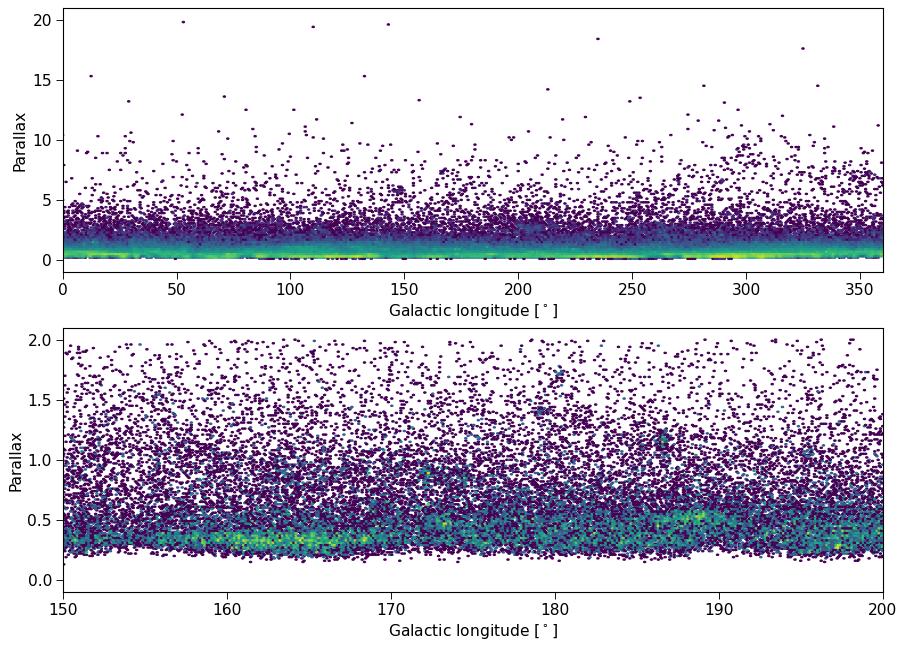

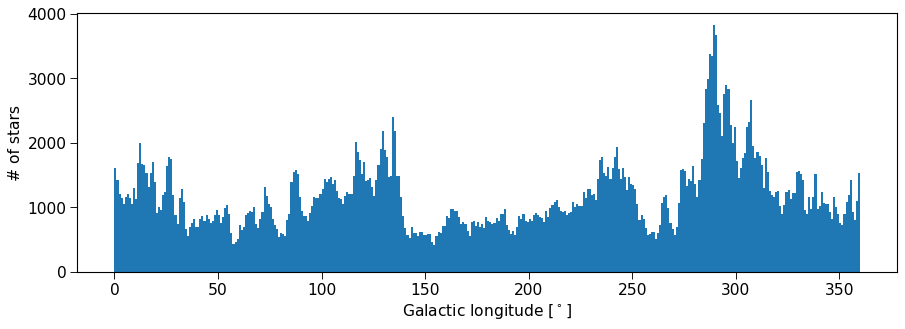

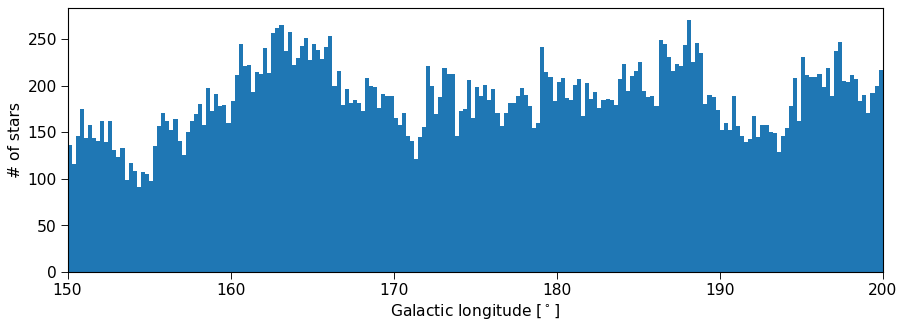

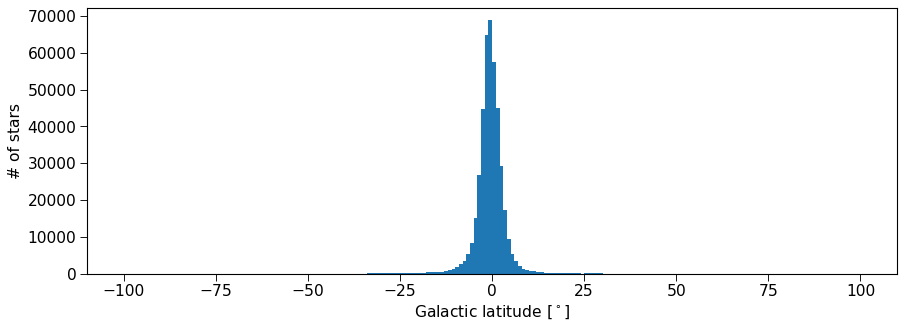

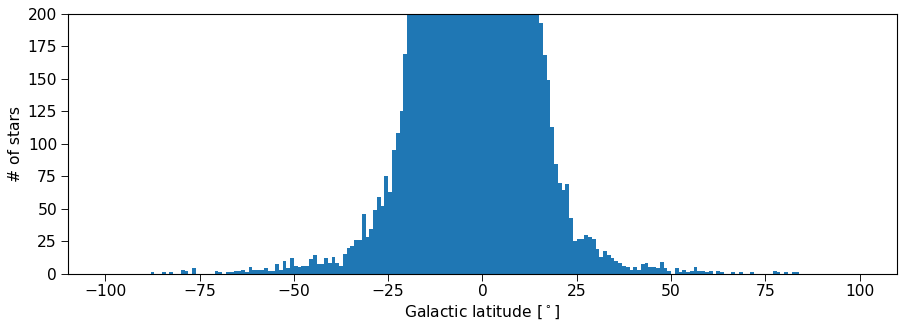

(0.0, 360.0)

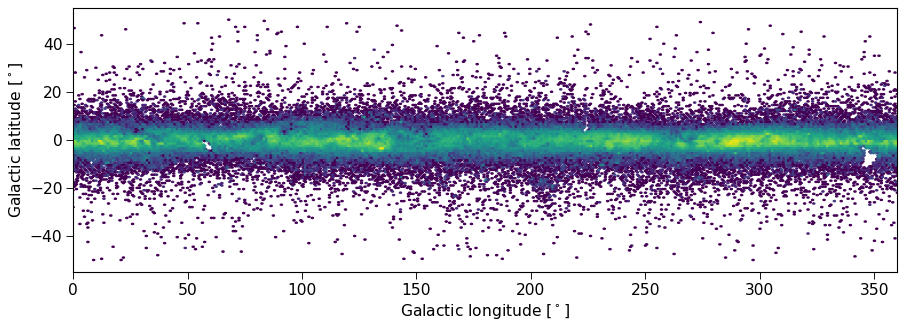

In [125]:
# We insert three parameters: galon, galat and plx
# Does parallax maybe show some periodicity?

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], plx, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,0,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'Parallax')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], plx, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[150,200,0,2])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'Parallax')
ax_lmub.set_xlim(150,200)

# No.


# Number of stars?
plt.figure(constrained_layout=True, figsize=(0.8*14,0.4*10))
plt.hist(obatable['l'][sample_filter], bins=np.linspace(0, 360, 361))
plt.xlabel(r'Galactic longitude [$^\circ$]')
plt.ylabel("# of stars")
plt.show()

plt.figure(constrained_layout=True, figsize=(0.8*14,0.4*10))
plt.hist(obatable['l'][sample_filter], bins=np.linspace(150, 200, 201))
plt.xlabel(r'Galactic longitude [$^\circ$]')
plt.ylabel("# of stars")
plt.xlim(150, 200)
plt.show()

plt.figure(constrained_layout=True, figsize=(0.8*14,0.4*10))
plt.hist(obatable['b'][sample_filter], bins=np.linspace(-100, 100, 201))
plt.xlabel(r'Galactic latitude [$^\circ$]')
plt.ylabel("# of stars")
plt.show()

plt.figure(constrained_layout=True, figsize=(0.8*14,0.4*10))
plt.hist(obatable['b'][sample_filter], bins=np.linspace(-100, 100, 201))
plt.xlabel(r'Galactic latitude [$^\circ$]')
plt.ylabel("# of stars")
# plt.xlim(150, 200)
plt.ylim(0, 200)
plt.show()

# No.


# Galat vs. galon
# Has some gaps, but no extrodinary behaviour

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.4*10))
gs = GridSpec(1, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(galon, galat, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-50,50])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_xlim(0,360)



## Replicating runaway figure from Zari book

Selection process through Zari's method.

Old try:

In [117]:
A = 4.74047  # km s^-1 yr

prop_mot_lon = np.array(obatable['pml'][sample_filter].tolist())
prop_mot_lat = np.array(obatable['pmb'][sample_filter].tolist())
plx = np.array(obatable['parallax'][sample_filter].tolist())

vsun = np.array([0.0, vcircsun, 0.0])# + vsunpeculiar.value

# Is vsun_pec niet in de xyz richting? Dan kan deze optelling hier nog niet!
v_lon = A * prop_mot_lon / plx# + vsun[1]
v_lat = A * prop_mot_lat / plx# + vsun[2]
# for n in range(len(v_lon)):
#     v_lon[n] = v_lon[n] + vsun
#     v_lat[n] = v_lat[n] + vsun

###

#################################################

def v_lon_model_values(longitude_vals = np.deg2rad(obatable['l'][sample_filter]).tolist(), latitude_vals=np.deg2rad(obatable['b'][sample_filter]).tolist(), plx=plx):
    hbp = stan_model['best_params']['hbp']
    pbp = stan_model['best_params']['pbp']
    Vcirc_sun = stan_model['best_params']['Vcirc_sun']
    v0 = Vcirc_sun/(Rsun.value/hbp*(1+(Rsun.value/hbp)**2)**((pbp-2)/4))
    
    rvec = np.array([np.cos(latitude_vals)*np.cos(longitude_vals), np.cos(latitude_vals)*np.sin(longitude_vals), np.sin(latitude_vals)]).T
    Ysun = 0.0
    sunpos = np.array([-Rsun.value, Ysun, zsun.value])
    starpos = ((1.0/plx)*rvec.T).T# + sunpos     # parallax temp. replaced with 1
    Rstar = np.zeros(starpos[:,0].shape)
    for n in range(len(starpos)):
        starpos[n] = starpos[n] + sunpos
        Rstar[n] = np.sqrt(starpos[n][0]**2+starpos[n][1]**2)
        phis[n] = np.arctan2(starpos[n][2], starpos[n][1])
        
    pvec = np.array([-np.sin(longitude_vals), np.cos(longitude_vals), 0.0])
    v_phi_model = bp_function(Rstar, pbp, hbp, v0)
    v_lon_model = np.dot(pvec, np.array([-v_phi_model*np.sin(phis[n]), v_phi_model*np.cos(phis[n]), 0.0])-np.array([0.0, Vcirc_sun, 0.0]))
    return v_lon_model
#################################################

model_behaviour = v_lon_model_values()



fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], v_lon, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*}$ [km s$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], v_lat, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_lmub.set_xlim(0,360)

ax_lmul.scatter(obatable['l'][sample_filter], model_behaviour, c='C1', marker = '.', lw=1, label=rf'predicted values')

# print(median_dist)
# for dist, lstyle in zip([500, 2000], ['--C1', '-C1']):
#     distance = np.zeros_like(galon.value) + dist*u.pc
#     galat = np.zeros_like(galon.value) - np.rad2deg(np.arcsin(zsun.value/dist))*u.deg
#     pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
#     ax_lmul.plot(galon, pml_model, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmub.plot(galon, pmb_model, lstyle, lw=3)

# Adding projection of the suns motion as test/control:       ___ Nog niet gedaan!!!!! ___
# ax_lmul.plot(galon, vrad_model, c='C1', lw=3, label=rf'$d={dist:.0f}$ pc')

NameError: name 'phis' is not defined

## Substracting mean predicted proper motion

In [119]:
def bp_function(r, p_param, h_param, v0):
#     rotcur = lambda x : x/h_param * np.power(1 + (x/h_param)**2, (p_param-2)/4)
#     vc = v0*rotcur(r)
    return v0 * r/h_param * np.power(1 + (r/h_param)**2, (p_param-2)/4)

In [120]:
for par in stan_model['parnames']:
    vals = oba_fit.stan_variable(par)
    stan_model['best_params'][par] = np.median(vals)
    q1, q2, q3 = scap(vals, [16, 50, 84])
    print(f"{par} = {q2:.1f}+{q3-q2:.1f}-{q2-q1:.1f}")

Vcirc_sun = 231.7+1.5-1.5
hbp = 4.8+0.2-0.3
pbp = -0.9+0.1-0.1
Vsun_pec_x = 9.0+0.4-0.4
Vsun_pec_y = 10.7+0.4-0.4
Vsun_pec_z = 8.0+0.1-0.1
vdispR = 17.3+0.4-0.3
vdispPhi = 12.0+0.4-0.3
vdispZ = 7.2+0.1-0.1


[array([-0.43797979, -0.44122061, -0.44436842, ..., -0.81738516,
        -0.81727736, -0.81780982])
 array([-0.89898482, -0.89739867, -0.89584413, ...,  0.57609157,
         0.57624449,  0.57548857])                               0.0]
(3,)
[[-0.88715705  0.43221738 -0.16168028]
 [-0.88450416  0.43488082 -0.16891141]
 [-0.88259043  0.43779414 -0.17137801]
 ...
 [ 0.5760765   0.81736378  0.00723252]
 [ 0.5762271   0.81725269  0.00777005]
 [ 0.57547861  0.81779567  0.00588302]]
[8.79855039 9.01480119 8.79652908 ... 7.43565026 7.04368643 7.68668133]
[  9.53724032   2.7372363   11.95572073 ... -33.2500386  -91.05418804
   0.30125172]
[2.03295377 2.65934483 2.033363   ... 2.16859411 2.22672622 2.01369592]
[ 7.50428655e+00  7.78914697e-02  9.92235773e+00 ... -3.54186327e+01
 -9.32809143e+01 -1.71244420e+00]


<ipython-input-121-4195c783feeb>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pvec = np.array([-np.sin(galon), np.cos(galon), 0.0]).T
<ipython-input-121-4195c783feeb>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_lon_model = np.dot(pvec, np.array([-v_phi_model*np.sin(phis[n]), v_phi_model*np.cos(phis[n]), 0.0])-np.array([0.0, Vcirc_sun, 0.0]))


(0.0, 360.0)

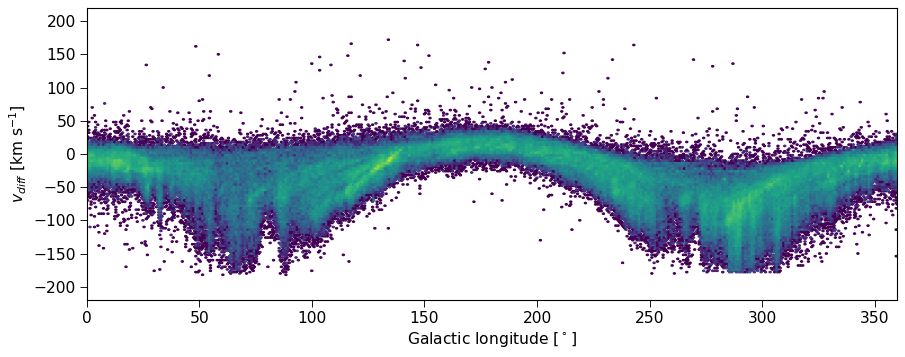

In [121]:
# Per radius, via model v uitrekenen
# Dat dan aftrekken van de sters eigenschappen
# is v_phi == v_lon ??? Nee.

galon = np.deg2rad(obatable['l'][sample_filter]).tolist()
galat = np.deg2rad(obatable['b'][sample_filter]).tolist()
hbp = stan_model['best_params']['hbp']
pbp = stan_model['best_params']['pbp']
Vcirc_sun = stan_model['best_params']['Vcirc_sun']


v0 = Vcirc_sun/(Rsun.value/hbp*(1+(Rsun.value/hbp)**2)**((pbp-2)/4))  # Controleren values/astropy units

rvec = np.array([np.cos(galat)*np.cos(galon), np.cos(galat)*np.sin(galon), np.sin(galat)]).T
Ysun = 0.0
sunpos = np.array([-Rsun.value, Ysun, zsun.value])

starpos = ((1.0/plx)*rvec.T).T# + sunpos
Rstar = np.zeros(starpos[:,0].shape)
phis = np.zeros(starpos[:,0].shape)
for n in range(len(starpos)):
    starpos[n] = starpos[n] + sunpos
    
    Rstar[n] = np.sqrt(starpos[n][0]**2+starpos[n][1]**2)
    
    phis[n] = np.arctan2(starpos[n][2], starpos[n][1])
pvec = np.array([-np.sin(galon), np.cos(galon), 0.0]).T
print(pvec)
print(pvec.shape)
print(rvec)
    
v_phi_model = bp_function(Rstar, pbp, hbp, v0)
# Hier dus nog aan toevoegen:
v_lon_model = np.dot(pvec, np.array([-v_phi_model*np.sin(phis[n]), v_phi_model*np.cos(phis[n]), 0.0])-np.array([0.0, Vcirc_sun, 0.0]))


print(Rstar)
print(v_lon)
print(v_lon_model)
# for n in Rstar:
#     v_lon_model[n] = bp_function(Rstar[n], pbp, hbp, v0)

v_lon_diff = v_lon - v_lon_model
print(v_lon_diff)

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], v_lon_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{diff}$ [km s$^{-1}$]')
ax_lmul.set_xlim(0,360)

# ax_lmub = fig.add_subplot(gs[1,0])
# im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], v_lat, 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
# ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
# ax_lmub.set_ylabel(r'$v_b$ [km s$^{-1}$]')
# ax_lmub.set_xlim(0,360)


In [65]:
A = np.array([1,2,3,4,5,6])
B = np.array([1,2,3,4,5,6])
print(A*B.T)

C = np.array([[1,2], [2,3], [3,4], [4,5], [5,6], [6,7]])
print(A*C.T)


print(1.0/plx)
print(rvec)
print(((1.0/plx)*rvec.T).T)

[ 1  4  9 16 25 36]
[[ 1  4  9 16 25 36]
 [ 2  6 12 20 30 42]]
[0.58381019 0.82604566 0.58442434 ... 1.68339927 2.80659098 1.12114834]
[[-0.88715705  0.43221738 -0.16168028]
 [-0.88450416  0.43488082 -0.16891141]
 [-0.88259043  0.43779414 -0.17137801]
 ...
 [ 0.5760765   0.81736378  0.00723252]
 [ 0.5762271   0.81725269  0.00777005]
 [ 0.57547861  0.81779567  0.00588302]]
[[-0.51793133  0.25233291 -0.09439059]
 [-0.73064083  0.35923142 -0.13952854]
 [-0.51580733  0.25585755 -0.10015748]
 ...
 [ 0.96976677  1.3759496   0.01217521]
 [ 1.61723377  2.29369403  0.02180736]
 [ 0.64519689  0.91687026  0.00659574]]
